In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import spectrogram, get_window
from IPython.display import Audio

# Función para graficar el espectrograma
def plot_spectrogram(signal, sample_rate, overlapping = 0., window_type='hann', window_size=256):
    """
    Genera y grafica el espectrograma de una señal.

    Parámetros:
    - signal: la señal de audio
    - window_type: el tipo de ventana a usar (string, por ejemplo 'hann', 'hamming', etc.)
    - window_size: tamaño de la ventana (entero)
    - overlapping: porcentaje de solapamiento (valor entre 0 y 1)
    - fs: frecuencia de muestreo de la señal
    """
    # Crear la ventana
    window = get_window(window_type, window_size)

    # Calcular el paso de la ventana en función del solapamiento
    noverlap = int(overlapping * window_size)

    # Calcular el espectrograma usando scipy.signal.spectrogram
    f, t, Sxx = spectrogram(signal, fs=sample_rate, window=window,
                            nperseg=window_size, noverlap=noverlap)


    # Graficar el espectrograma
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title('Espectrograma')
    plt.ylabel('Frecuencia [Hz]')
    plt.xlabel('Tiempo [s]')
    plt.colorbar(label='Amplitud [dB]')
    plt.show()


Canal 1 - Tamaño de señal: (1800,)


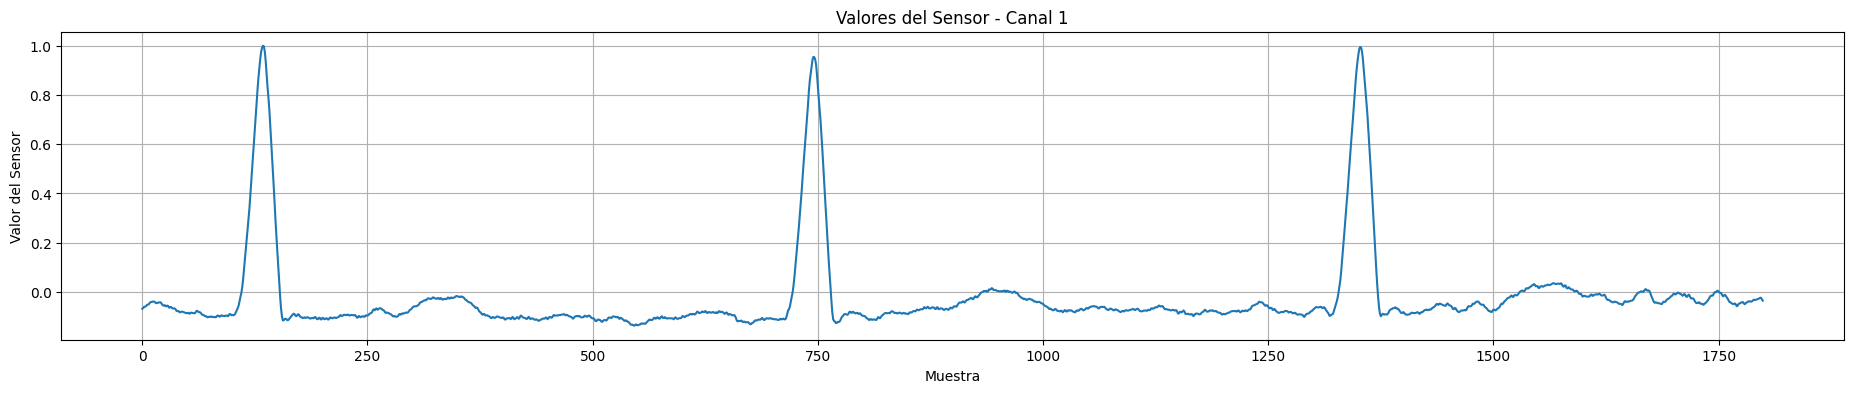

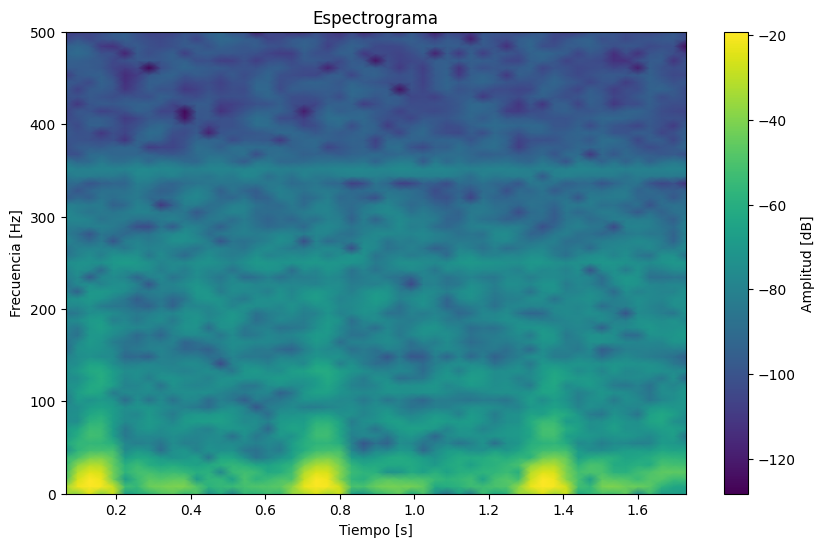

Canal 2 - Tamaño de señal: (1800,)


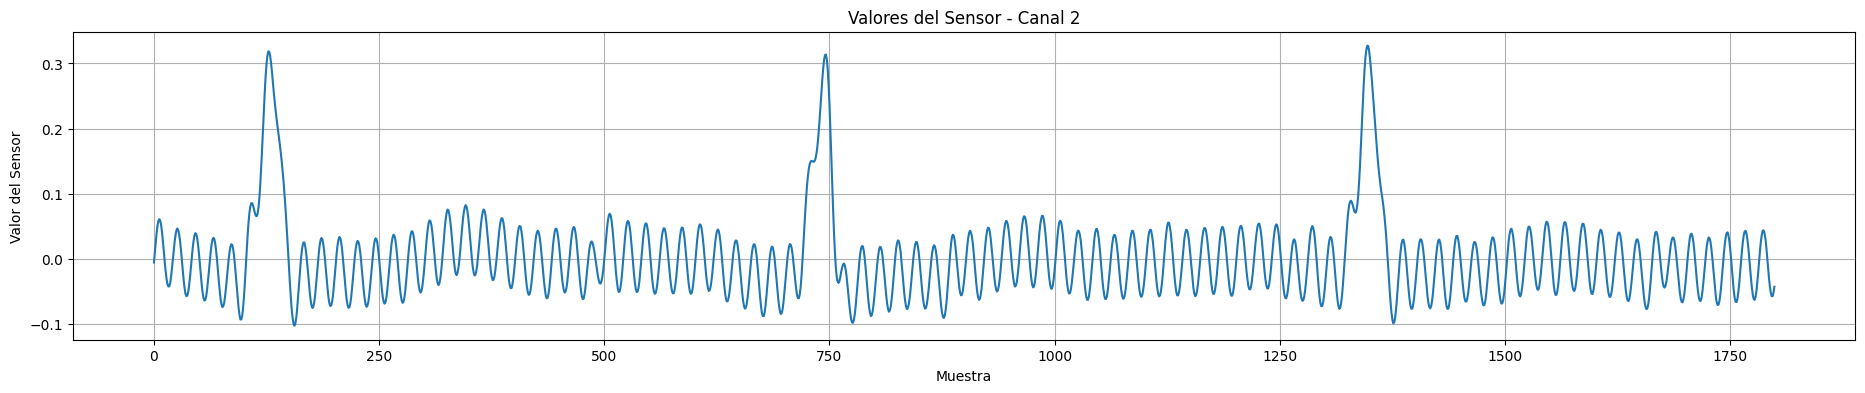

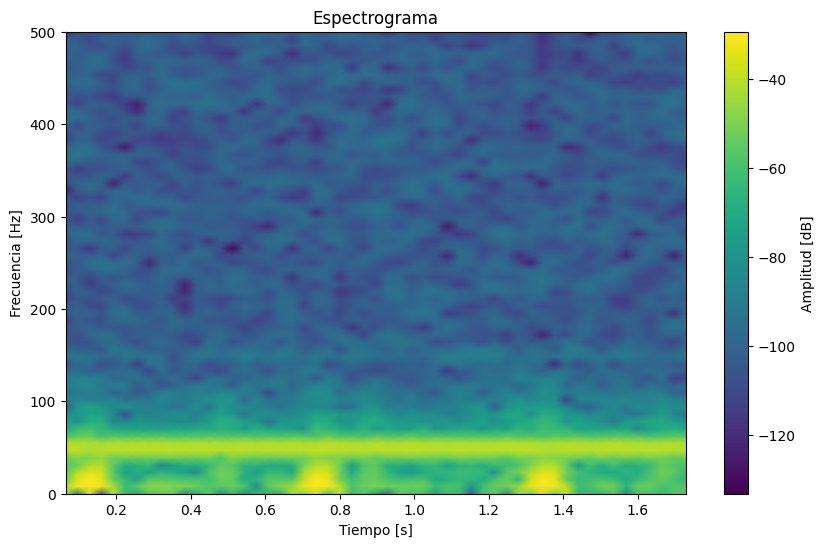

Canal 3 - Tamaño de señal: (1800,)


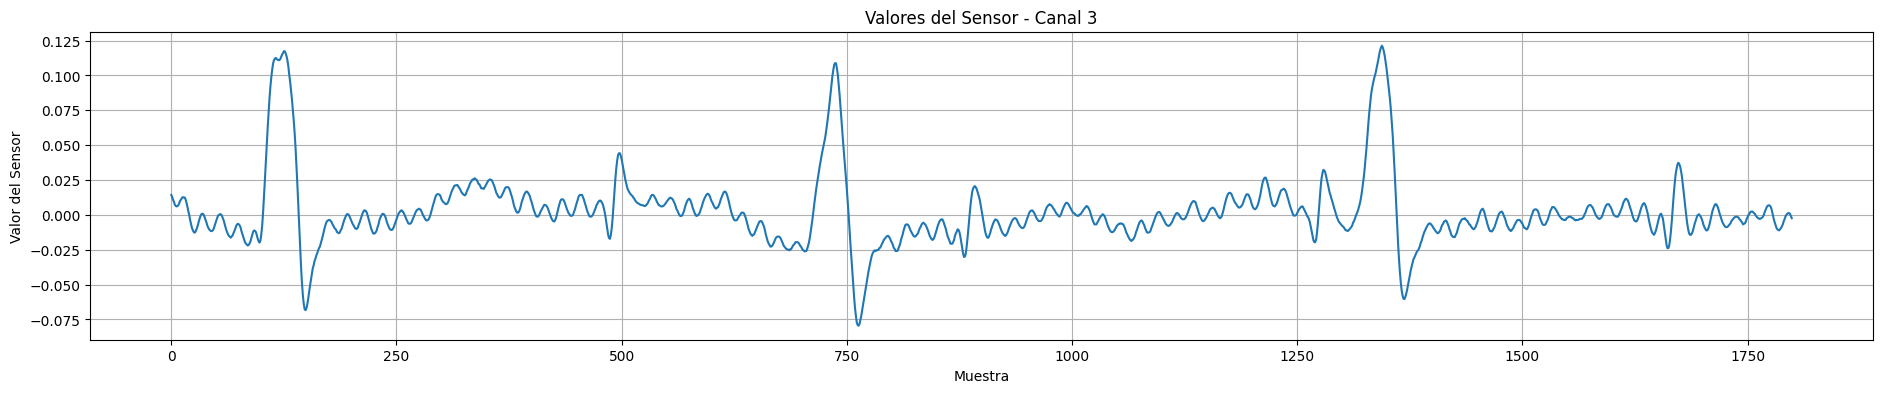

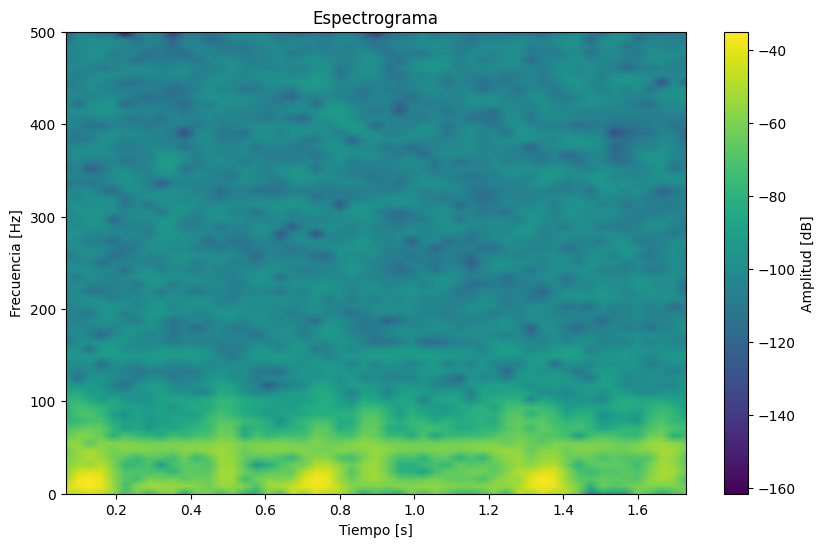

Canal 4 - Tamaño de señal: (1800,)


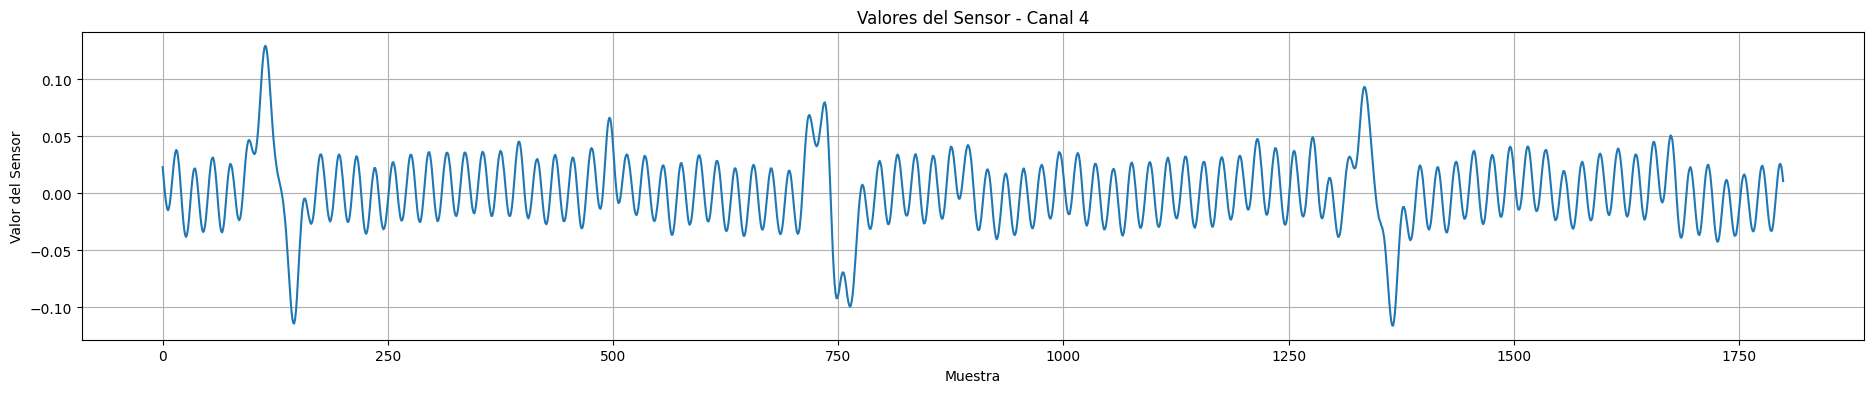

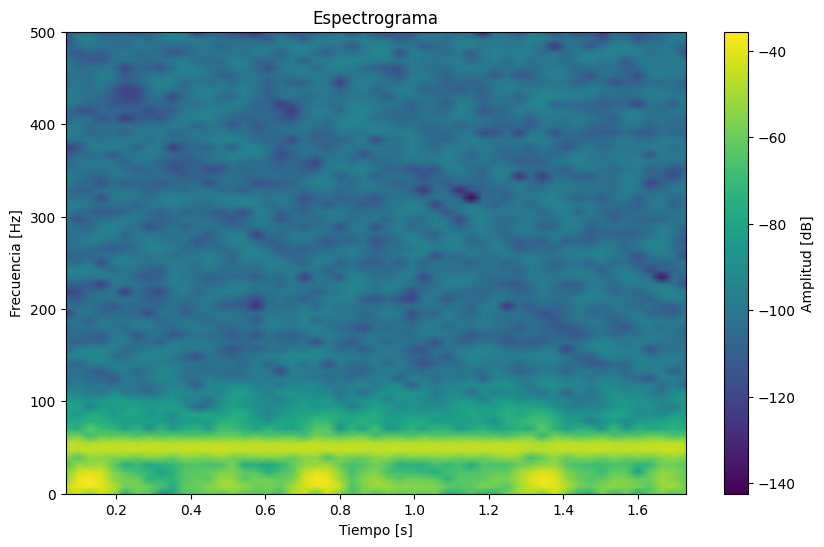

Canal 5 - Tamaño de señal: (1800,)


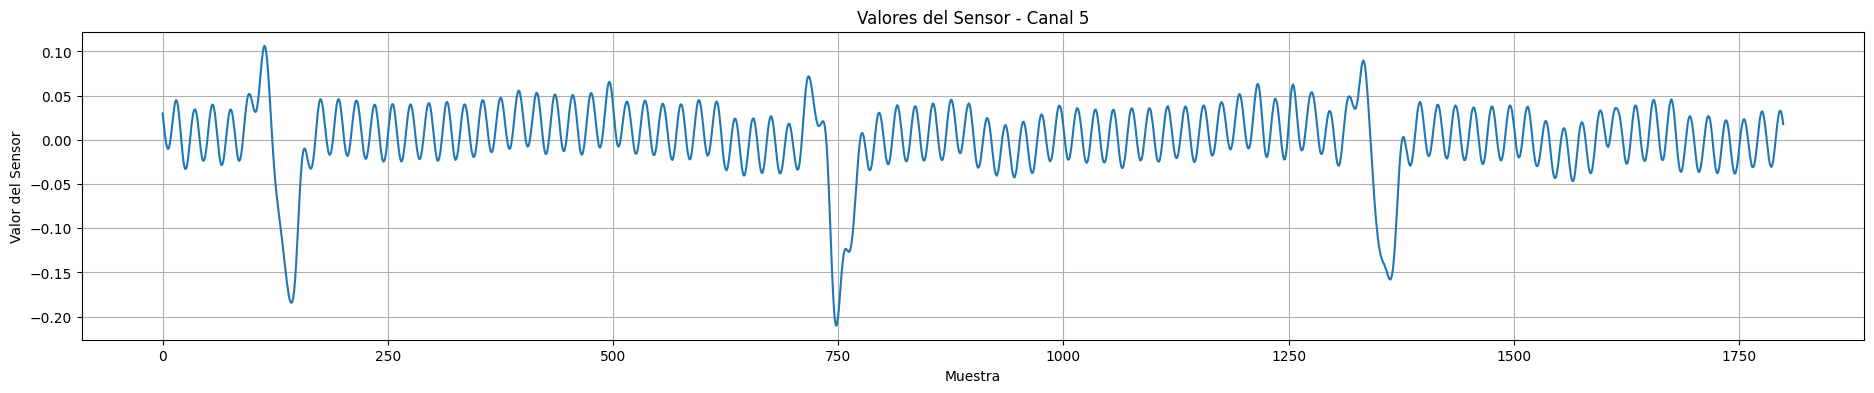

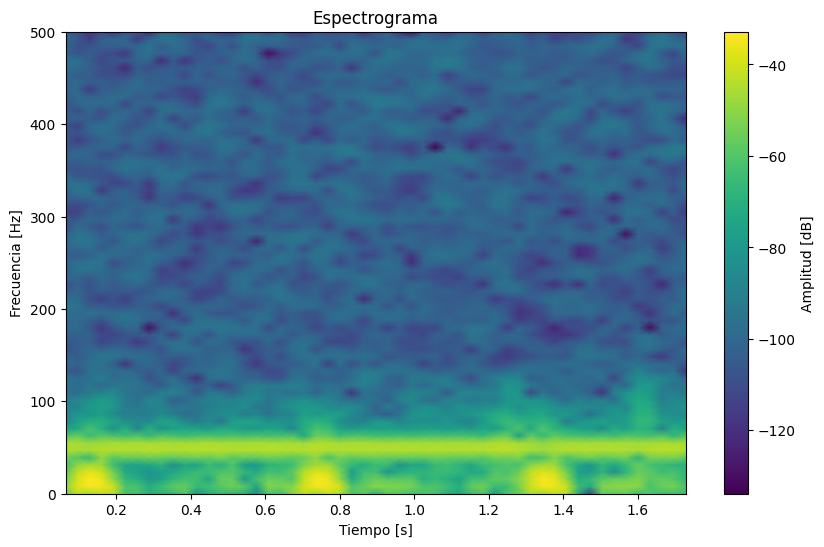

Canal 6 - Tamaño de señal: (1800,)


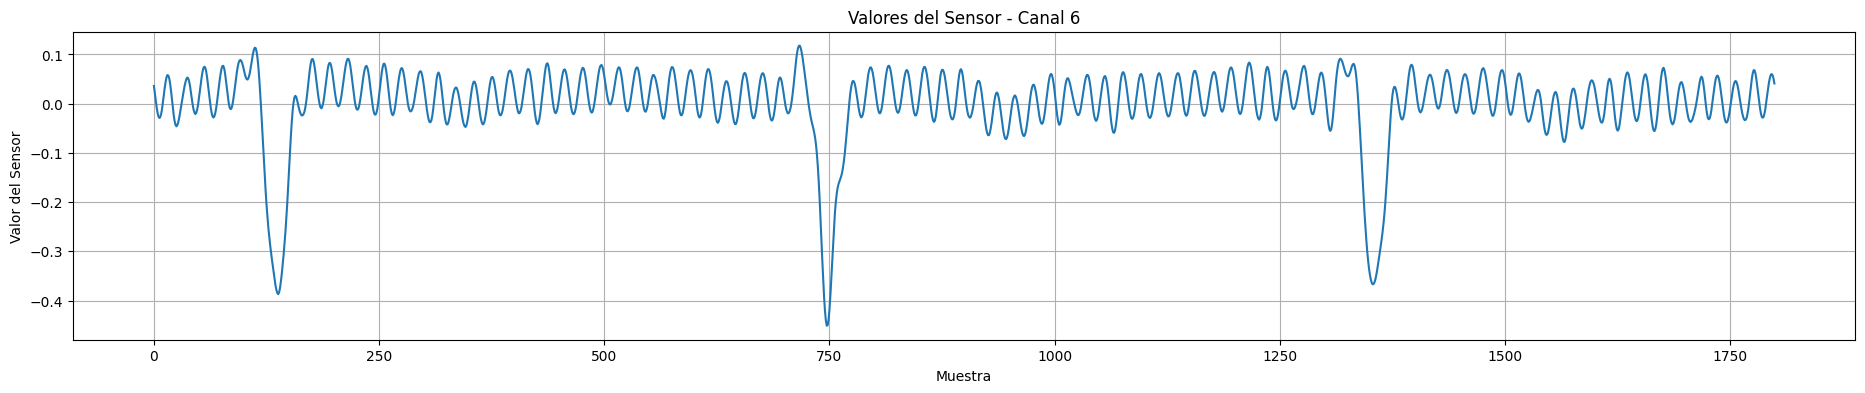

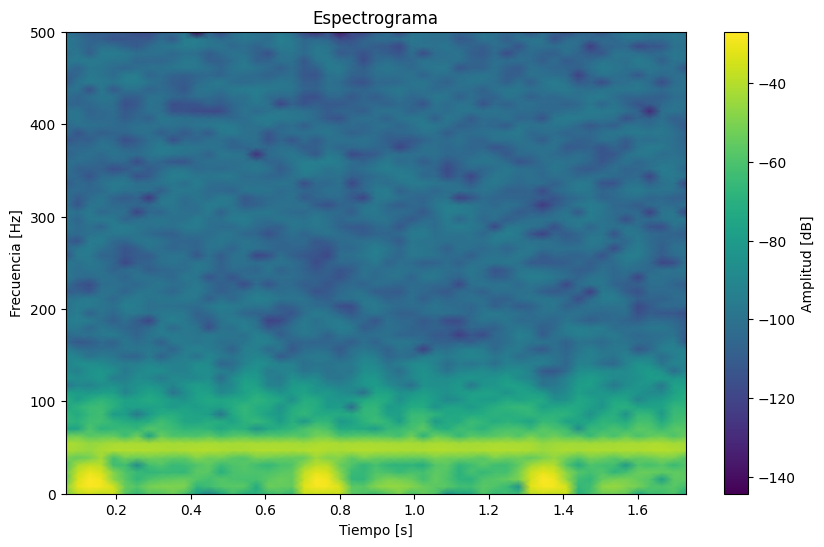

In [2]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, get_window

# Nombre del archivo sin extensión
record_name = 'NIFAECG/NR_02'

# Cargar el archivo .dat y su metainformación
record = wfdb.rdrecord(record_name)

# Acceder a los datos de la señal (todas las señales)
signals = record.p_signal[3200:5000, :]  # Cargar un segmento específico
n_channels = signals.shape[1]  # Número de canales

# Configuración de la frecuencia de muestreo (asegúrate de que sea correcta)
sample_rate = record.fs

#normalizar la señal
signals = signals/np.max(np.abs(signals))

# Graficar cada canal y su espectrograma
for i in range(n_channels):
    print(f"Canal {i+1} - Tamaño de señal: {signals[:, i].shape}")

    # Graficar la señal de tiempo
    plt.figure(figsize=(23, 4))
    plt.plot(signals[:, i])
    plt.xlabel('Muestra')
    plt.ylabel('Valor del Sensor')
    plt.title(f'Valores del Sensor - Canal {i+1}')
    plt.grid(True)
    plt.show()
    
    # Graficar el espectrograma
    plot_spectrogram(signals[:, i], sample_rate, overlapping=0.75, window_type='hann', window_size=128)


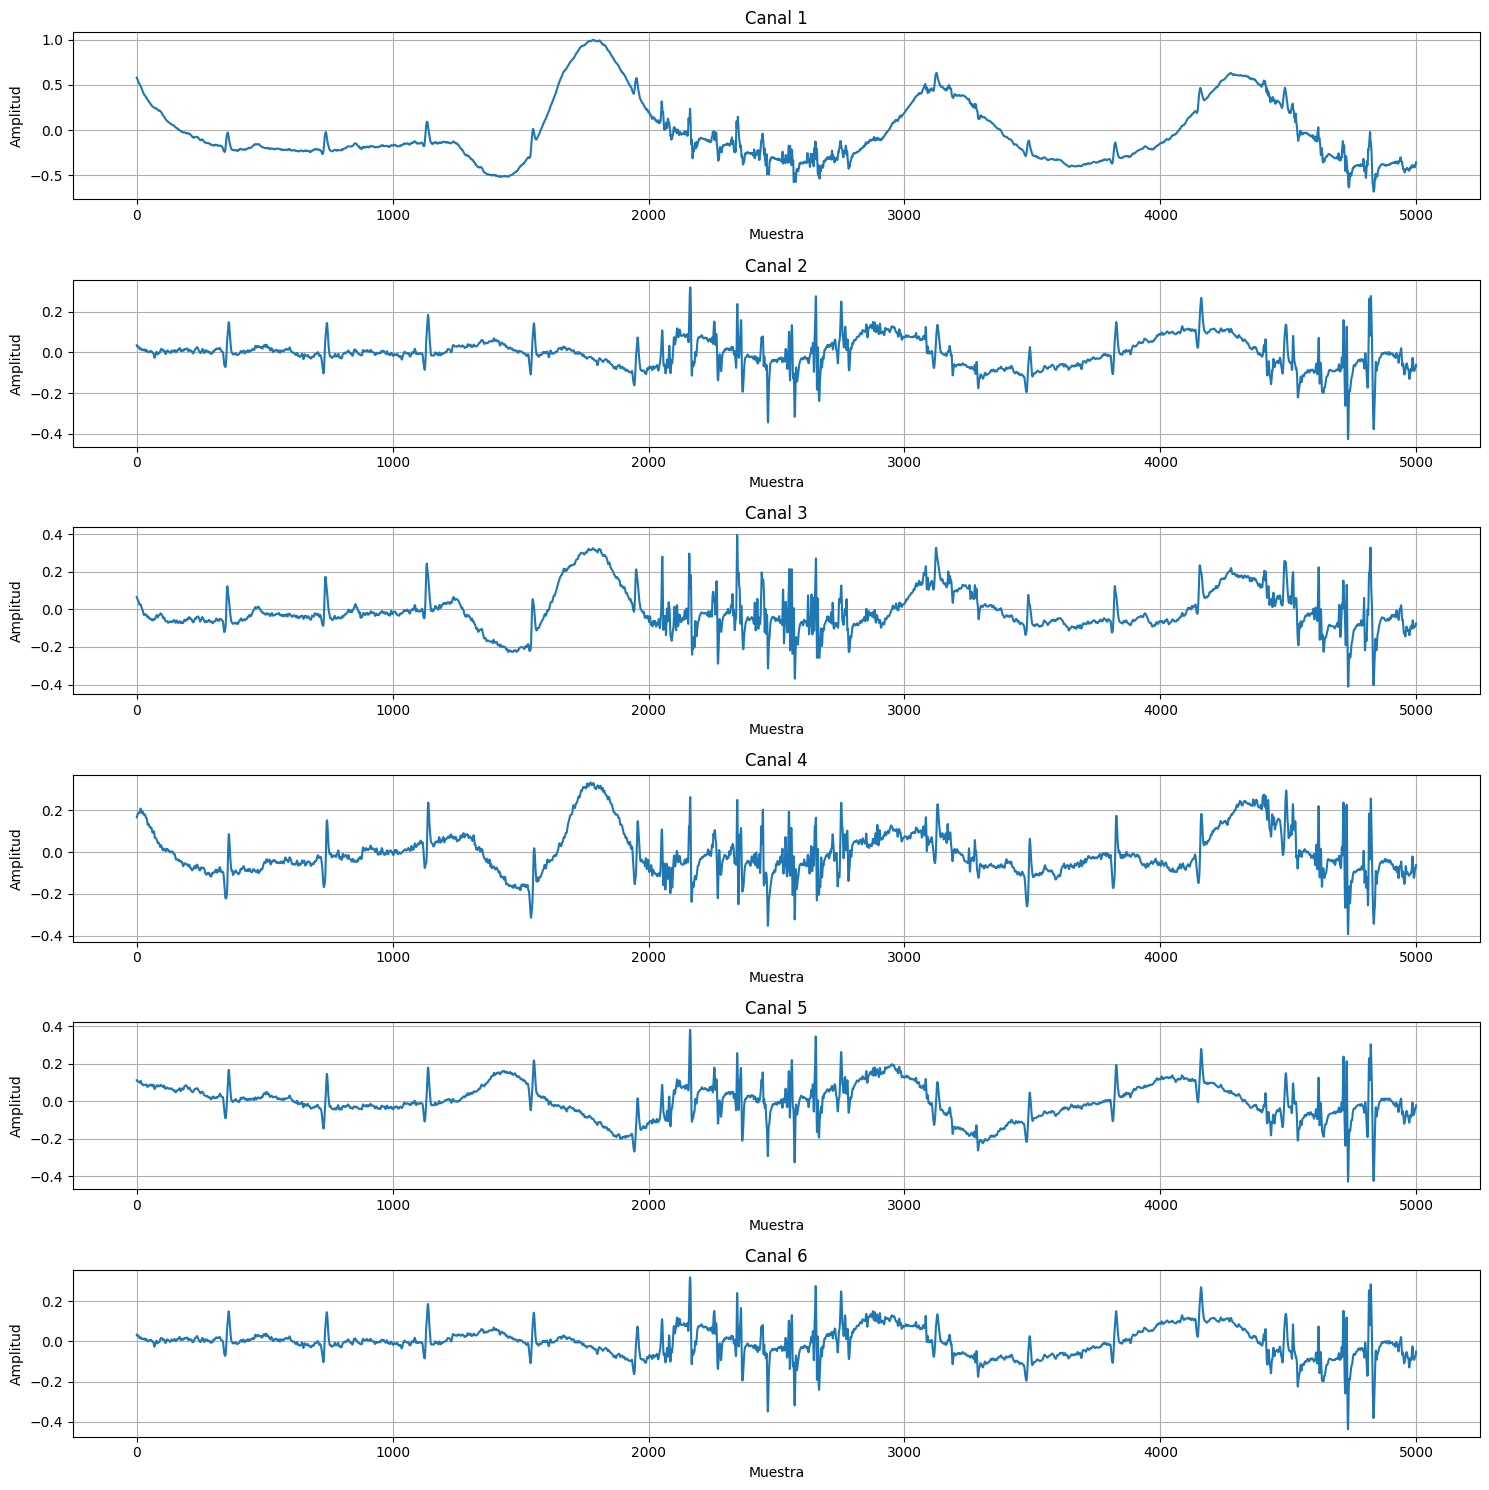

In [19]:
# Graficar todos los canales en subplots
plt.figure(figsize=(15, 2.5 * n_channels))
for i in range(n_channels):
    plt.subplot(n_channels, 1, i + 1)
    plt.plot(signals[:, i])
    plt.title(f'Canal {i+1}')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    plt.grid(True)

plt.tight_layout()
plt.show()

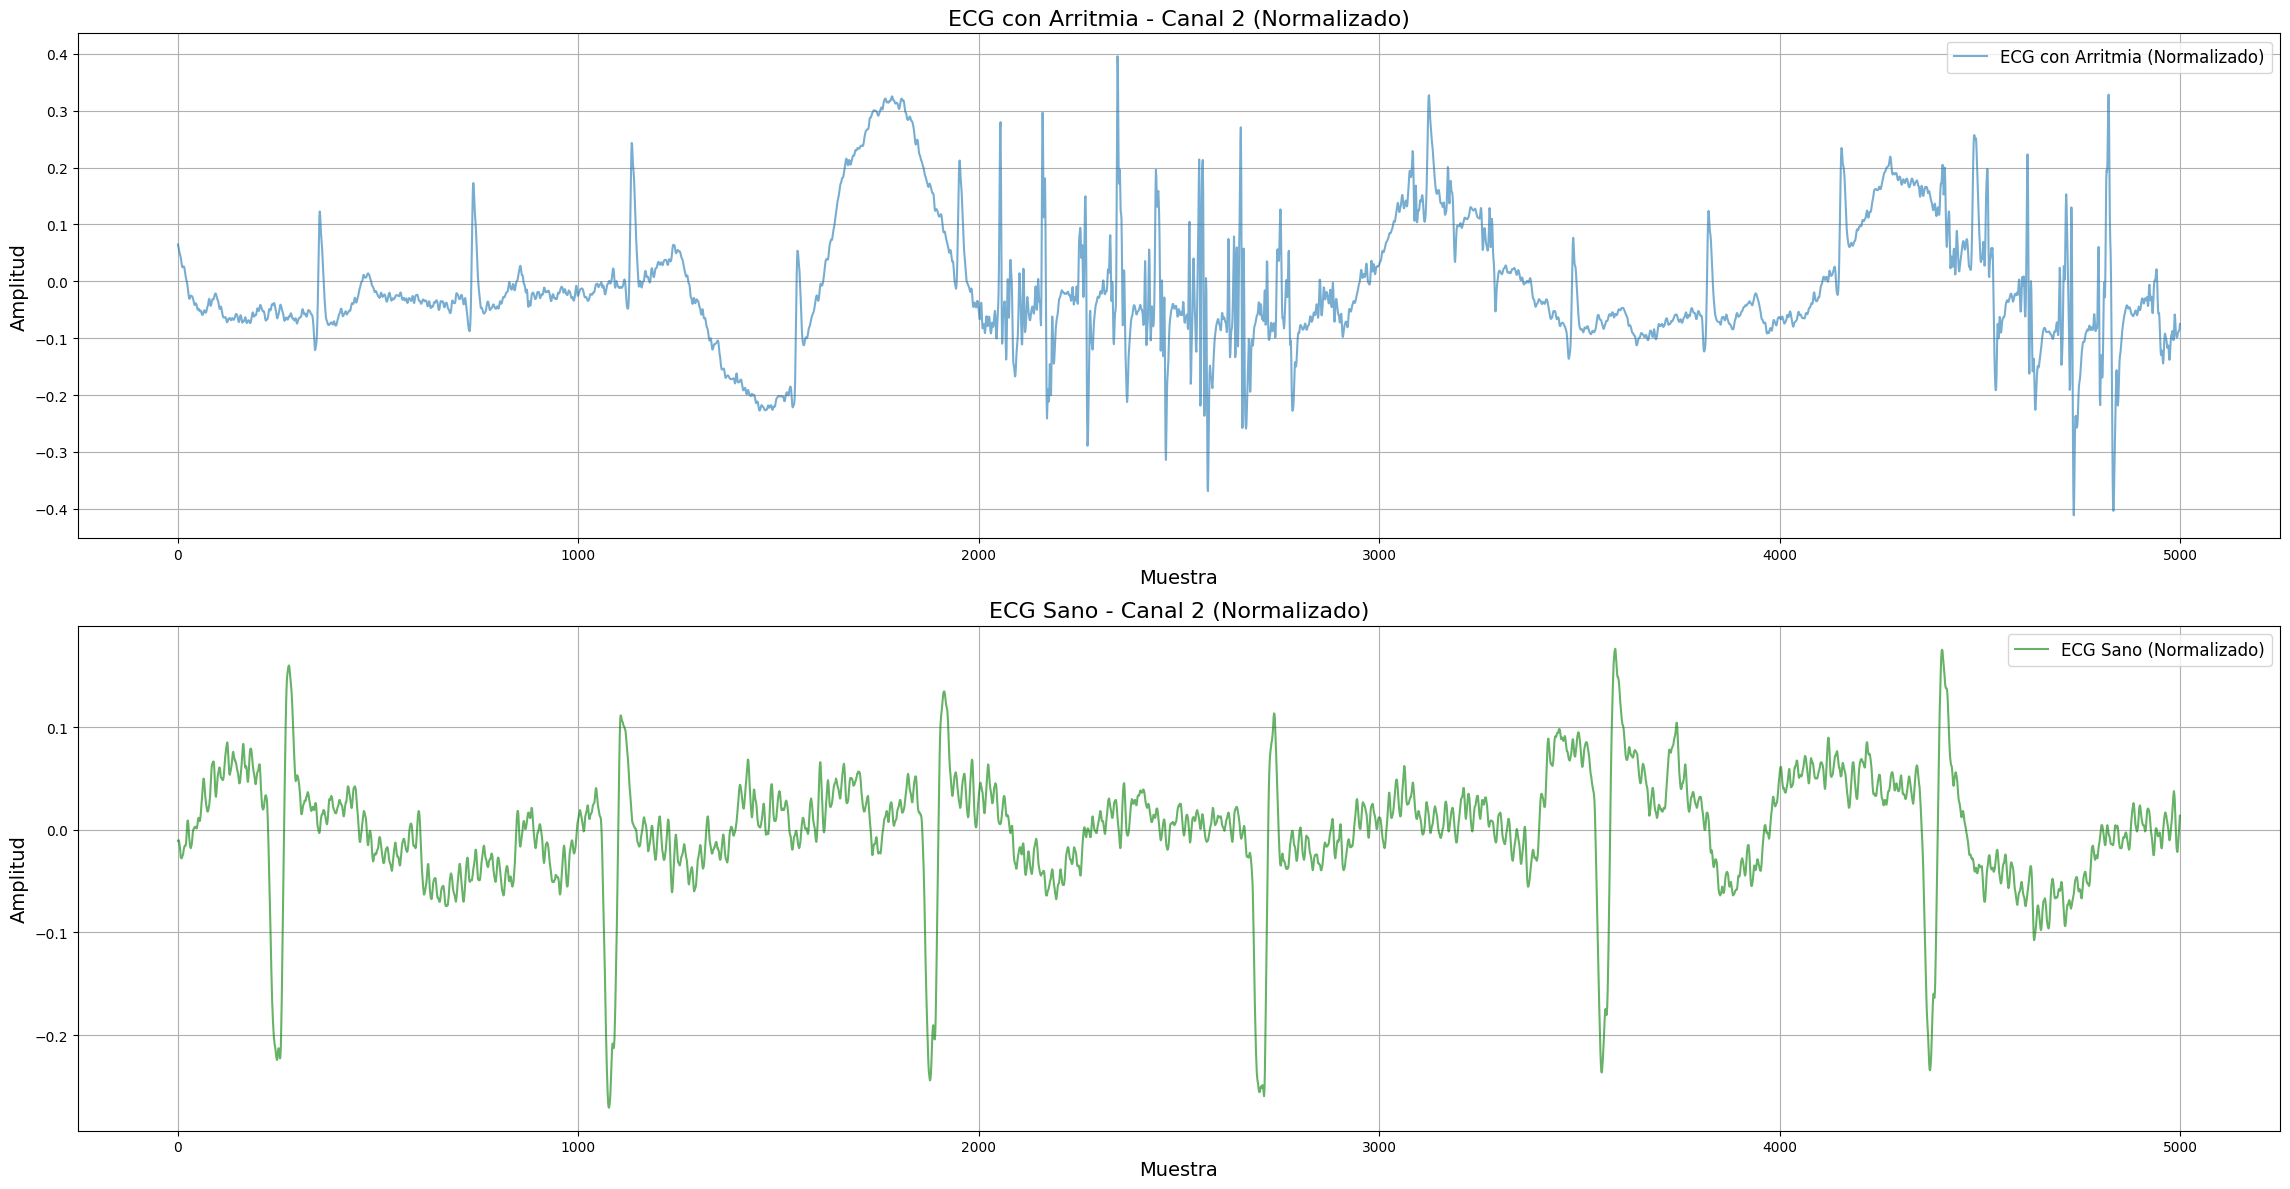

In [4]:
# Asumiendo que signals contiene la señal de ECG con arritmia
# Nombre del archivo sin extensión
record_name = 'NIFAECG/ARR_06'

# Cargar el archivo .dat y su metainformación
record = wfdb.rdrecord(record_name)

# Acceder a los datos de la señal (todas las señales)
signals = record.p_signal[1000:6000, :]  # Cargar un segmento específico
n_channels = signals.shape[1]  # Número de canales

# Y que healthy_signals contiene la señal de ECG sana
# Nombre del archivo sin extensión
record_name = 'NIFAECG/NR_06'

# Cargar el archivo .dat y su metainformación
record = wfdb.rdrecord(record_name)

# Acceder a los datos de la señal (todas las señales)
healthy_signals = record.p_signal[1200:6200, :]  # Cargar un segmento específico
n_channels = healthy_signals.shape[1]  # Número de canales

# Normalizar las señales
signals = signals / np.max(np.abs(signals))
healthy_signals = healthy_signals / np.max(np.abs(healthy_signals))

# Graficar el canal 1 de ECG sano junto al canal 1 de ECG con arritmia después de la normalización
plt.figure(figsize=(23, 12))

# Graficar ECG con arritmia en la parte superior
plt.subplot(2, 1, 1)
plt.plot(signals[:, 2], label='ECG con Arritmia (Normalizado)', alpha=0.6)
plt.xlabel('Muestra', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.title('ECG con Arritmia - Canal 2 (Normalizado)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Graficar ECG sano en la parte inferior
plt.subplot(2, 1, 2)
plt.plot(healthy_signals[:, 2], label='ECG Sano (Normalizado)', alpha=0.6, color='green')
plt.xlabel('Muestra', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.title('ECG Sano - Canal 2 (Normalizado)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
sample_rate = record.fs  # Frecuencia de muestreo, por ejemplo, 500 Hz o 1 kHz
print(f"Frecuencia de muestreo: {sample_rate} Hz")


Frecuencia de muestreo: 1000 Hz


In [6]:
num_samples = signals.shape[0]  # Número de muestras en el segmento
nyquist_interval = sample_rate / 2  # Intervalo de Nyquist
print(f"Número de muestras: {num_samples}")
print(f"Intervalo de Nyquist: {nyquist_interval} Hz")


Número de muestras: 5000
Intervalo de Nyquist: 500.0 Hz


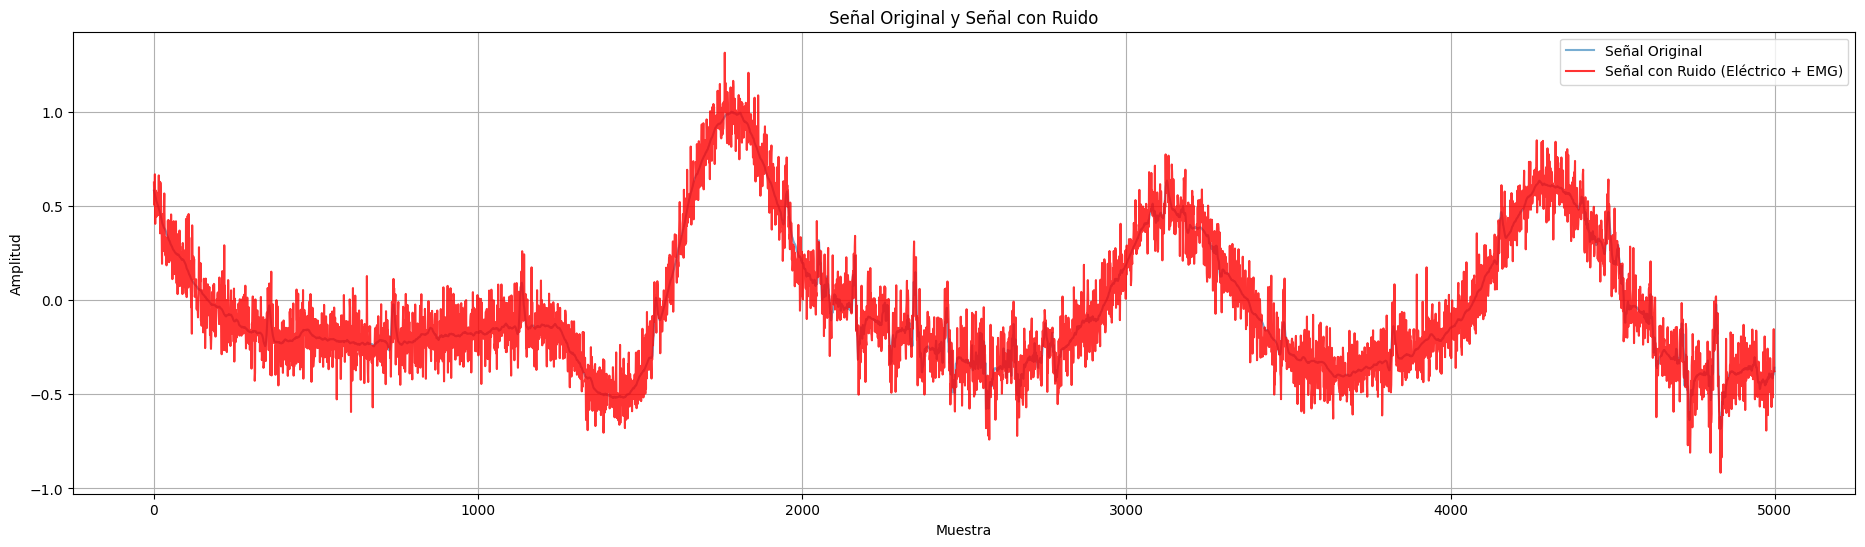

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generar ruido eléctrico (50 Hz)
def generate_electrical_noise(frequency, sample_rate, duration, amplitude=0.05):
    t = np.arange(0, duration, 1/sample_rate)
    noise = amplitude * np.sin(2 * np.pi * frequency * t)
    return noise

# Generar ruido EMG (ruido blanco)
def generate_emg_noise(sample_rate, num_samples, amplitude=0.05):
    emg_noise = amplitude * np.random.normal(0, 1, num_samples)
    return emg_noise

# Parámetros de la señal
sample_rate = record.fs
fs = record.fs  # Frecuencia de muestreo
num_samples = signals.shape[0]
duration = num_samples / sample_rate  # Duración en segundos

# Generar ruido eléctrico y ruido EMG
electrical_noise = generate_electrical_noise(50, fs, duration, amplitude=0.02)
emg_noise = generate_emg_noise(fs, num_samples, amplitude=0.1)

# Agregar ruido a la señal original (por ejemplo, al primer canal)
noisy_signal = signals[:, 0] + electrical_noise + emg_noise

# Graficar la señal original y la señal con ruido
plt.figure(figsize=(23, 6))
plt.plot(signals[:, 0], label='Señal Original', alpha=0.6)
plt.plot(noisy_signal, label='Señal con Ruido (Eléctrico + EMG)', alpha=0.8, color='r')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.title('Señal Original y Señal con Ruido')
plt.legend()
plt.grid(True)
plt.show()


SNR antes del filtrado: 10.80 dB
SNR después del filtrado: 6.54 dB


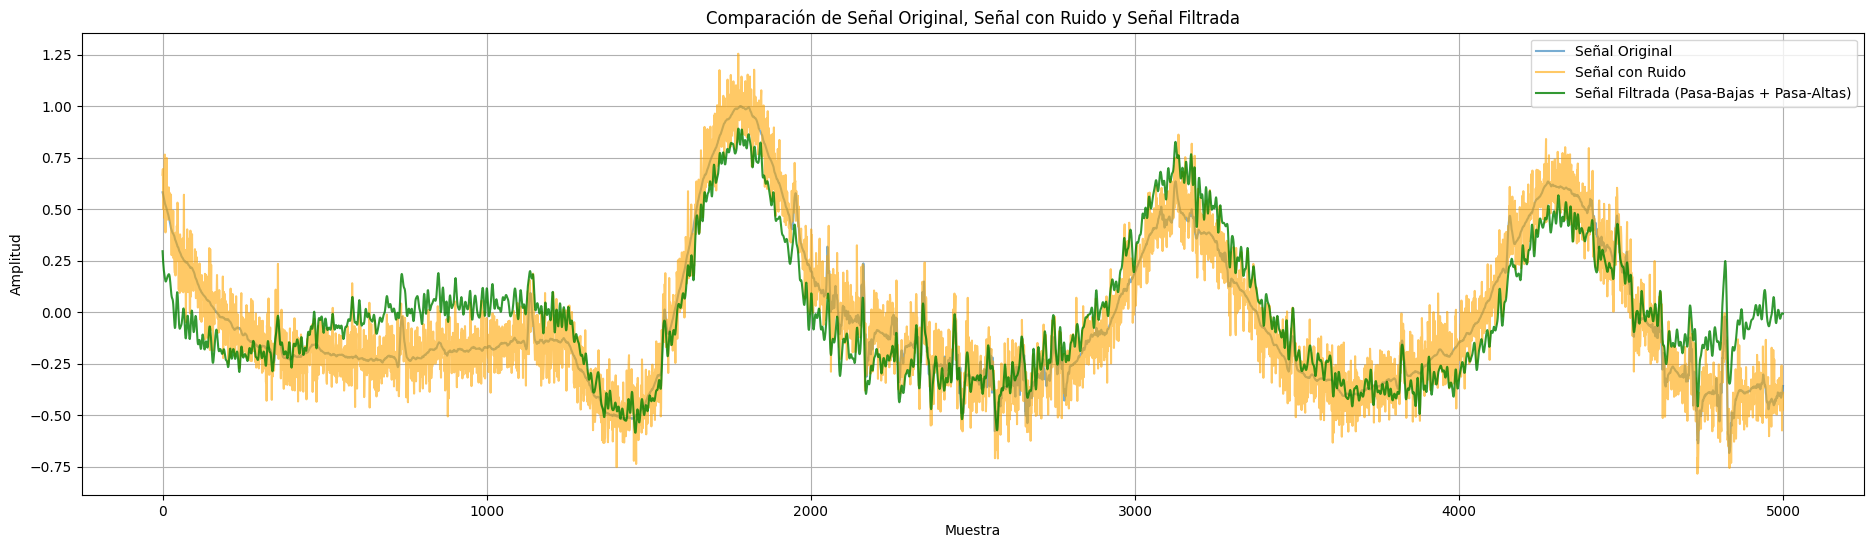

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Función para calcular la relación señal-ruido (SNR)
def calculate_snr(original_signal, noisy_signal):
    signal_power = np.mean(original_signal ** 2)
    noise_power = np.mean((original_signal - noisy_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Función para diseñar y aplicar un filtro Butterworth
def butter_filter(signal, cutoff, fs, order=4, filter_type='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Parámetros de la señal
fs = record.fs  # Frecuencia de muestreo
cutoff_low = 100  # Frecuencia de corte para el filtro pasa-bajas
cutoff_high = 0.5  # Frecuencia de corte para el filtro pasa-altas

# Generar ruido eléctrico y ruido EMG
electrical_noise = generate_electrical_noise(50, fs, duration, amplitude=0.02)
emg_noise = generate_emg_noise(fs, num_samples, amplitude=0.1)

# Agregar ruido a la señal original
noisy_signal = signals[:, 0] + electrical_noise + emg_noise

# Calcular SNR antes del filtrado
snr_before = calculate_snr(signals[:, 0], noisy_signal)
print(f"SNR antes del filtrado: {snr_before:.2f} dB")

# Aplicar filtro pasa-bajas y pasa-altas
filtered_signal_low = butter_filter(noisy_signal, cutoff_low, fs, order=5, filter_type='low')
filtered_signal_high = butter_filter(filtered_signal_low, cutoff_high, fs, order=5, filter_type='high')

# Calcular SNR después del filtrado
snr_after = calculate_snr(signals[:, 0], filtered_signal_high)
print(f"SNR después del filtrado: {snr_after:.2f} dB")

# Graficar las señales
plt.figure(figsize=(23, 6))
plt.plot(signals[:, 0], label='Señal Original', alpha=0.6)
plt.plot(noisy_signal, label='Señal con Ruido', alpha=0.6, color='orange')
plt.plot(filtered_signal_high, label='Señal Filtrada (Pasa-Bajas + Pasa-Altas)', alpha=0.8, color='green')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.title('Comparación de Señal Original, Señal con Ruido y Señal Filtrada')
plt.legend()
plt.grid(True)
plt.show()



Procesando Canal 1
SNR antes del filtrado: 15.11 dB
SNR después del filtrado: 6.98 dB


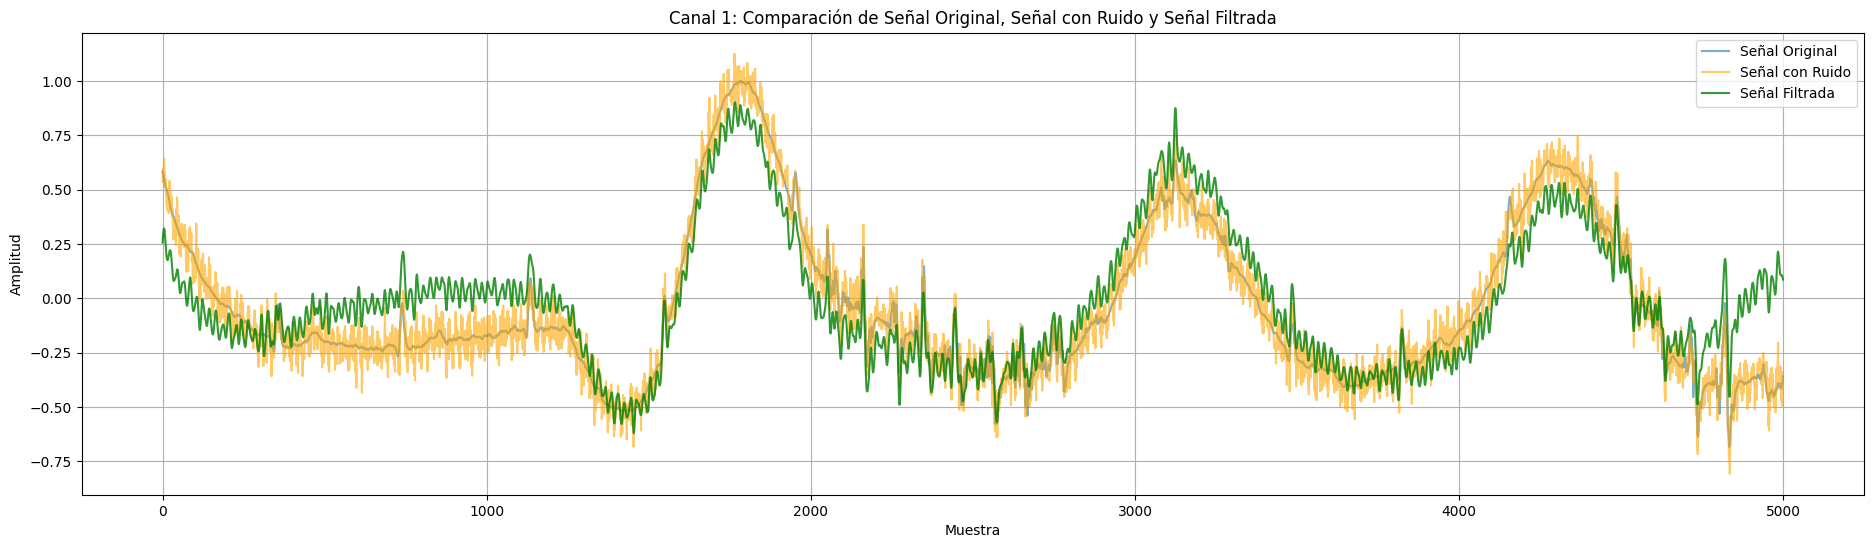


Procesando Canal 2
SNR antes del filtrado: 1.27 dB
SNR después del filtrado: 3.44 dB


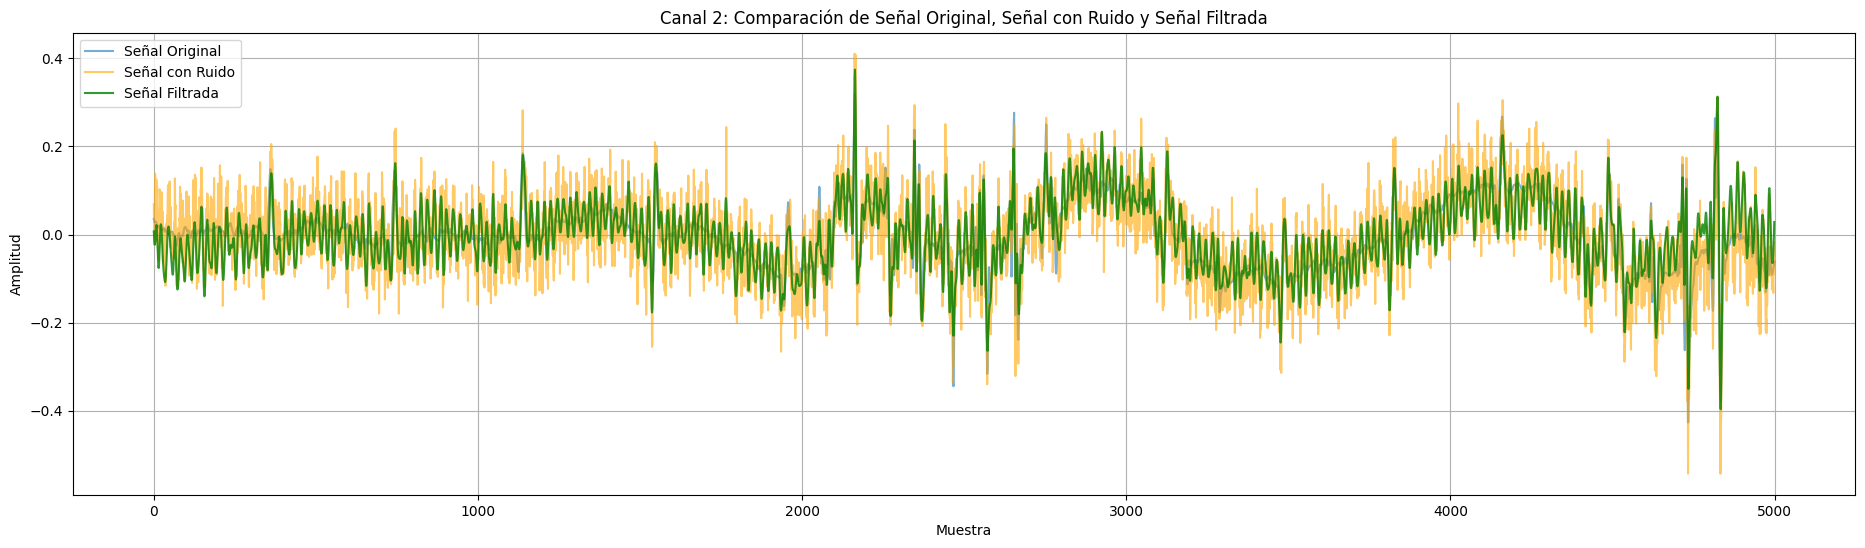


Procesando Canal 3
SNR antes del filtrado: 4.90 dB
SNR después del filtrado: 5.91 dB


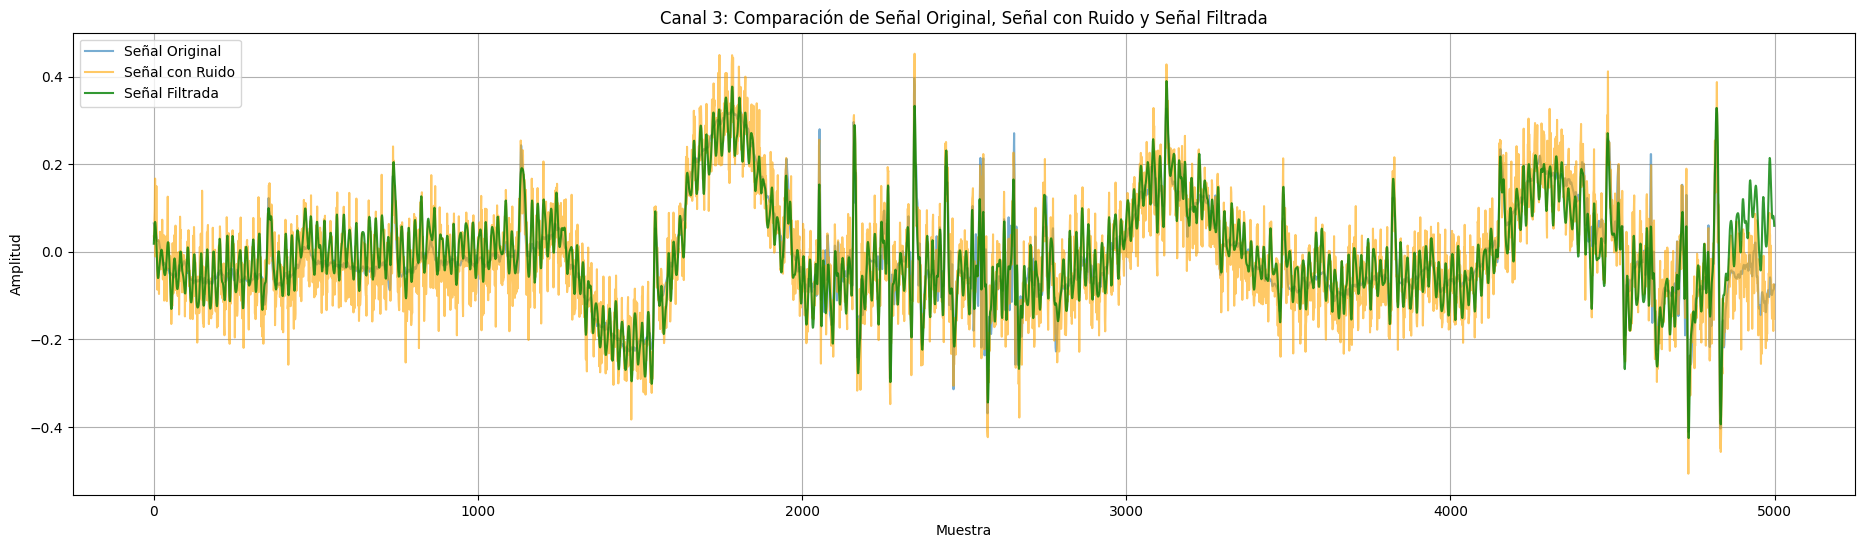


Procesando Canal 4
SNR antes del filtrado: 4.91 dB
SNR después del filtrado: 5.78 dB


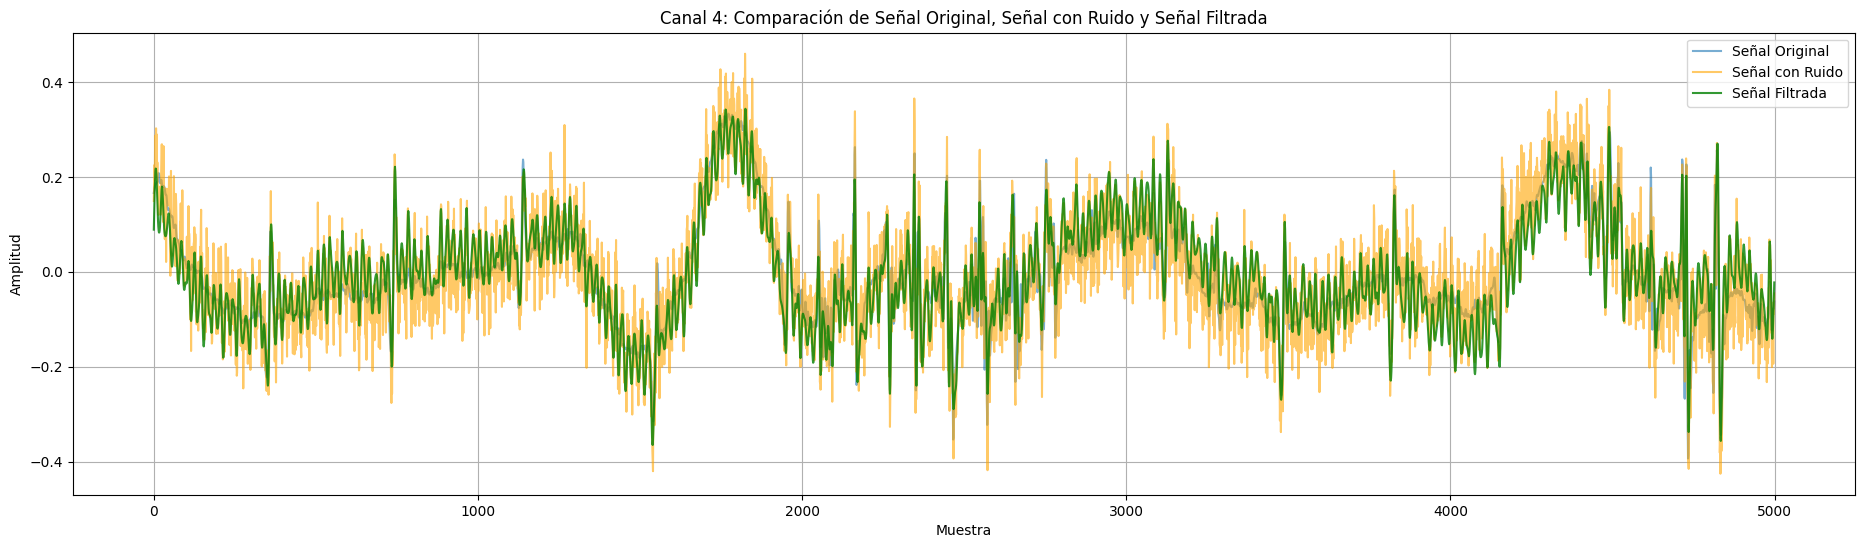


Procesando Canal 5
SNR antes del filtrado: 3.78 dB
SNR después del filtrado: 4.47 dB


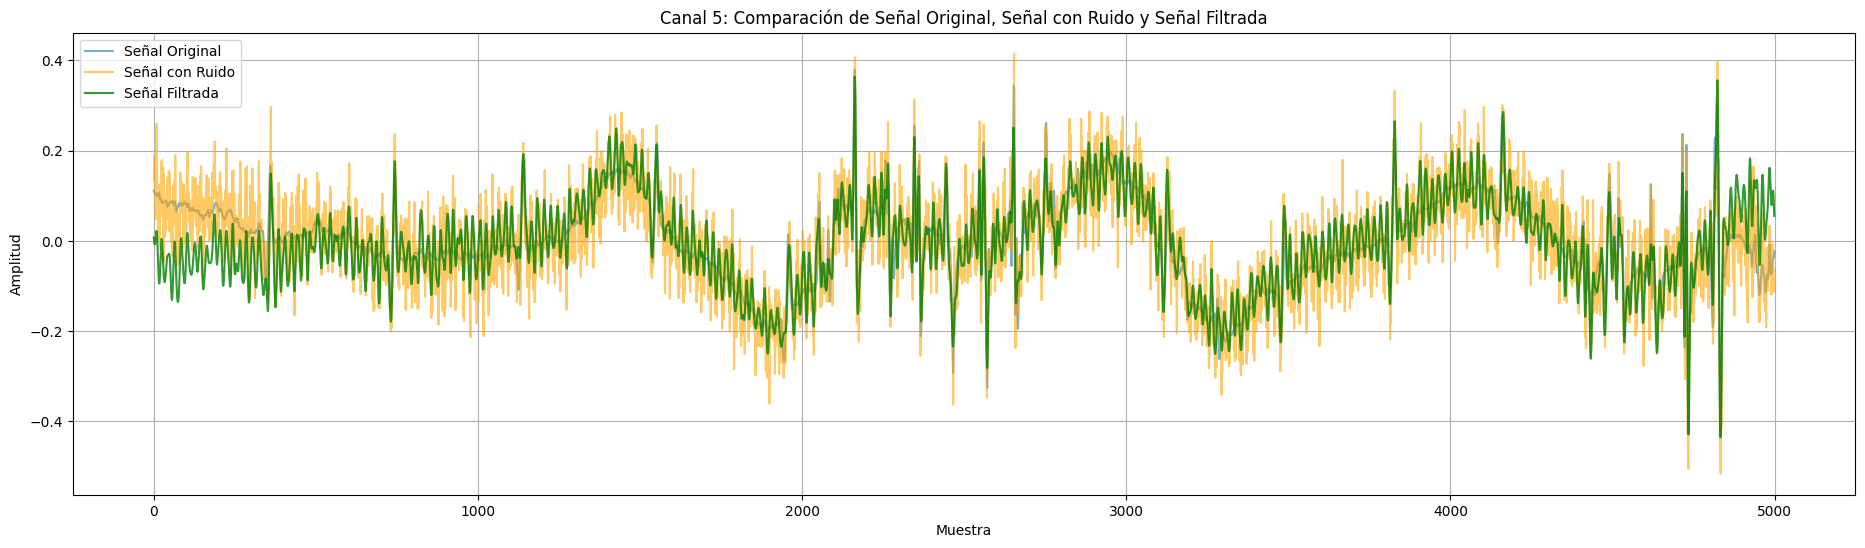


Procesando Canal 6
SNR antes del filtrado: 1.57 dB
SNR después del filtrado: 3.64 dB


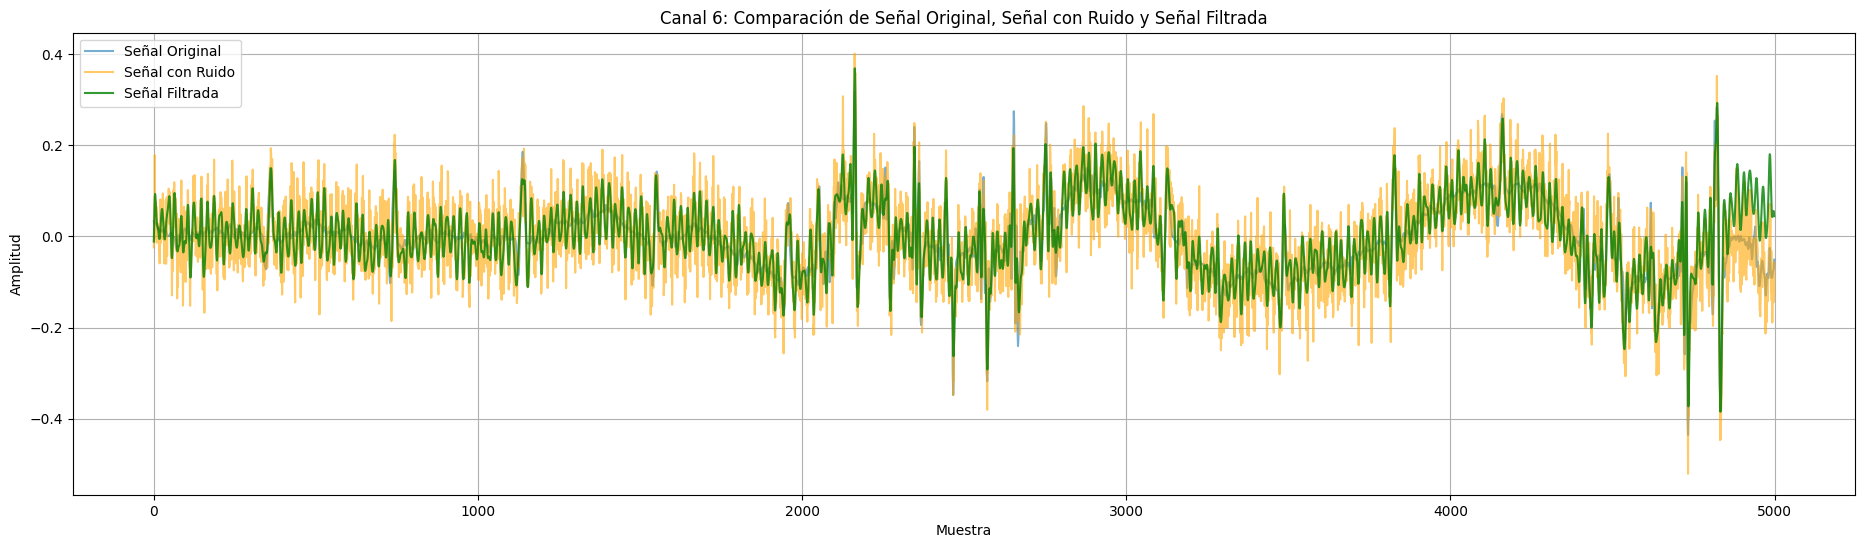

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Función para calcular la relación señal-ruido (SNR)
def calculate_snr(original_signal, processed_signal):
    signal_power = np.mean(original_signal ** 2)
    noise_power = np.mean((original_signal - processed_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Función para diseñar y aplicar un filtro Butterworth
def butter_filter(signal, cutoff, fs, order=4, filter_type='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Parámetros de la señal
fs = record.fs  # Frecuencia de muestreo
cutoff_low = 100  # Frecuencia de corte para el filtro pasa-bajas
cutoff_high = 0.5  # Frecuencia de corte para el filtro pasa-altas
num_samples = signals.shape[0]
duration = num_samples / fs  # Duración en segundos

n_channels = signals.shape[1]  # Número de canales

# Iterar sobre cada canal
for i in range(n_channels):
    print(f"\nProcesando Canal {i+1}")

    original_signal = signals[:, i]

    # Generar ruido eléctrico y ruido EMG para este canal
    electrical_noise = generate_electrical_noise(50, fs, duration, amplitude=0.05)
    emg_noise = generate_emg_noise(fs, num_samples, amplitude=0.05)

    # Agregar ruido a la señal original
    noisy_signal = original_signal + electrical_noise + emg_noise

    # Calcular SNR antes del filtrado
    snr_before = calculate_snr(original_signal, noisy_signal)
    print(f"SNR antes del filtrado: {snr_before:.2f} dB")

    # Aplicar filtro pasa-bajas y pasa-altas
    filtered_signal_low = butter_filter(noisy_signal, cutoff_low, fs, order=5, filter_type='low')
    filtered_signal = butter_filter(filtered_signal_low, cutoff_high, fs, order=5, filter_type='high')

    # Calcular SNR después del filtrado
    snr_after = calculate_snr(original_signal, filtered_signal)
    print(f"SNR después del filtrado: {snr_after:.2f} dB")

    # Graficar las señales
    plt.figure(figsize=(23, 6))
    plt.plot(original_signal, label='Señal Original', alpha=0.6)
    plt.plot(noisy_signal, label='Señal con Ruido', alpha=0.6, color='orange')
    plt.plot(filtered_signal, label='Señal Filtrada', alpha=0.8, color='green')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    plt.title(f'Canal {i+1}: Comparación de Señal Original, Señal con Ruido y Señal Filtrada')
    plt.legend()
    plt.grid(True)
    plt.show()


In [10]:
# Función para calcular estadísticas temporales
def calculate_temporal_stats(signal):
    mean_value = np.mean(signal)
    median_value = np.median(signal)
    variance = np.var(signal)
    std_dev = np.std(signal)
    rms = np.sqrt(np.mean(signal**2))
    zero_crossings = ((signal[:-1] * signal[1:]) < 0).sum()
    
    stats = {
        'Media': mean_value,
        'Mediana': median_value,
        'Varianza': variance,
        'Desviación Estándar': std_dev,
        'RMS': rms,
        'Cruces por Cero': zero_crossings
    }
    return stats

# Calcular y mostrar estadísticas temporales para cada canal
for i in range(n_channels):
    print(f"\nEstadísticas Temporales para el Canal {i+1}")
    stats = calculate_temporal_stats(signals[:, i])
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")



Estadísticas Temporales para el Canal 1
Media: -0.0368
Mediana: -0.1553
Varianza: 0.1202
Desviación Estándar: 0.3467
RMS: 0.3487
Cruces por Cero: 23.0000

Estadísticas Temporales para el Canal 2
Media: -0.0033
Mediana: -0.0025
Varianza: 0.0052
Desviación Estándar: 0.0722
RMS: 0.0723
Cruces por Cero: 157.0000

Estadísticas Temporales para el Canal 3
Media: -0.0088
Mediana: -0.0339
Varianza: 0.0121
Desviación Estándar: 0.1099
RMS: 0.1103
Cruces por Cero: 136.0000

Estadísticas Temporales para el Canal 4
Media: -0.0053
Mediana: -0.0294
Varianza: 0.0117
Desviación Estándar: 0.1080
RMS: 0.1082
Cruces por Cero: 132.0000

Estadísticas Temporales para el Canal 5
Media: -0.0007
Mediana: -0.0018
Varianza: 0.0088
Desviación Estándar: 0.0937
RMS: 0.0937
Cruces por Cero: 112.0000

Estadísticas Temporales para el Canal 6
Media: -0.0033
Mediana: -0.0023
Varianza: 0.0052
Desviación Estándar: 0.0722
RMS: 0.0723
Cruces por Cero: 155.0000



FFT para el Canal 1


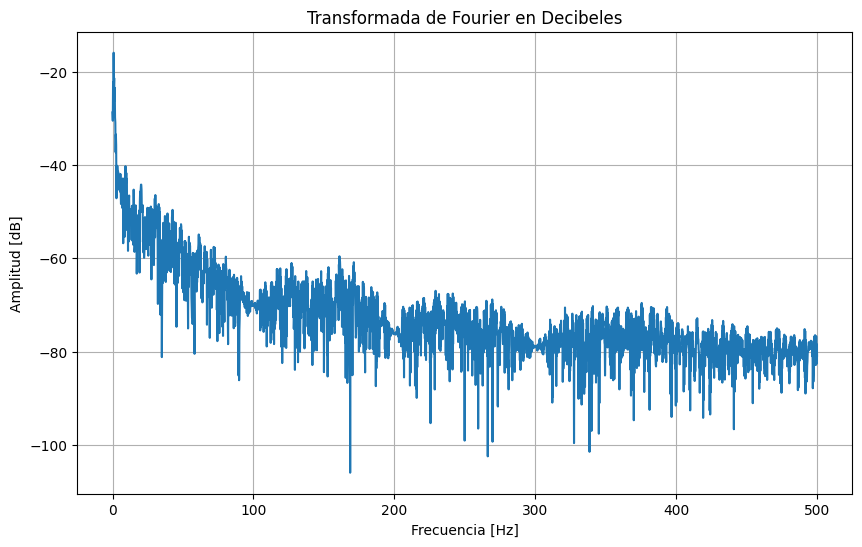


FFT para el Canal 2


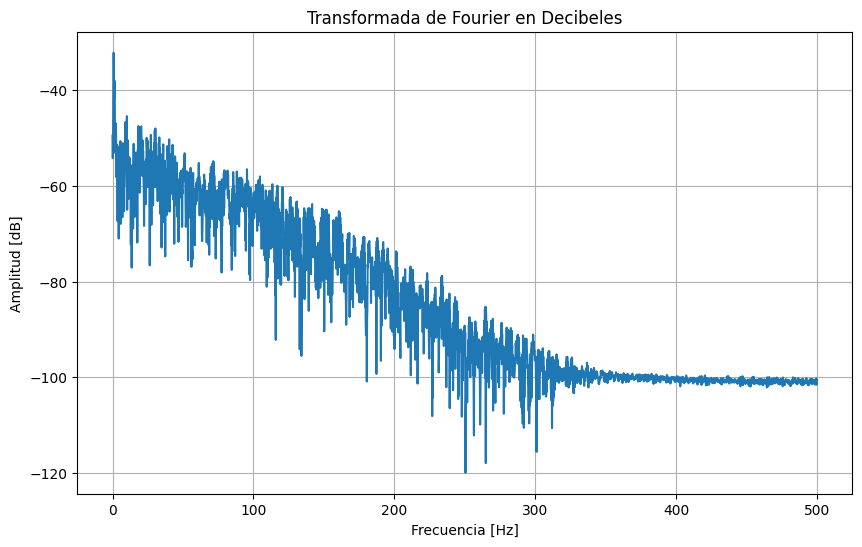


FFT para el Canal 3


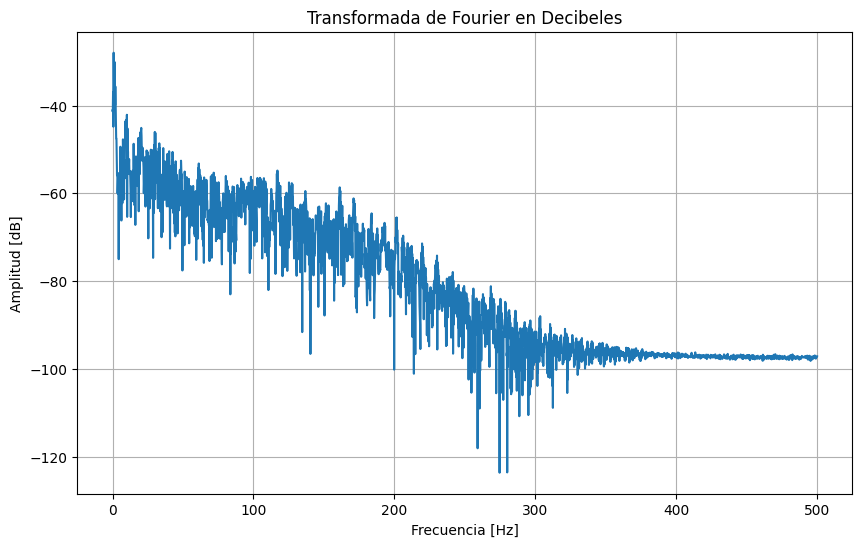


FFT para el Canal 4


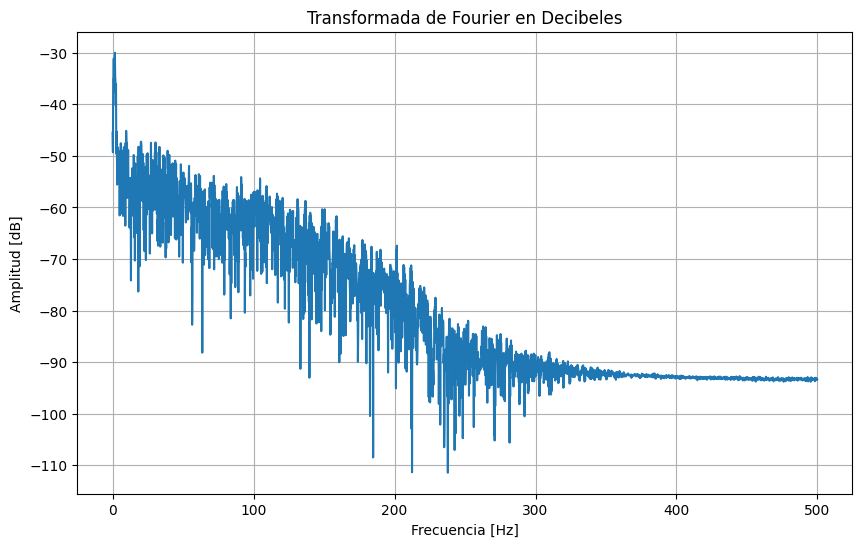


FFT para el Canal 5


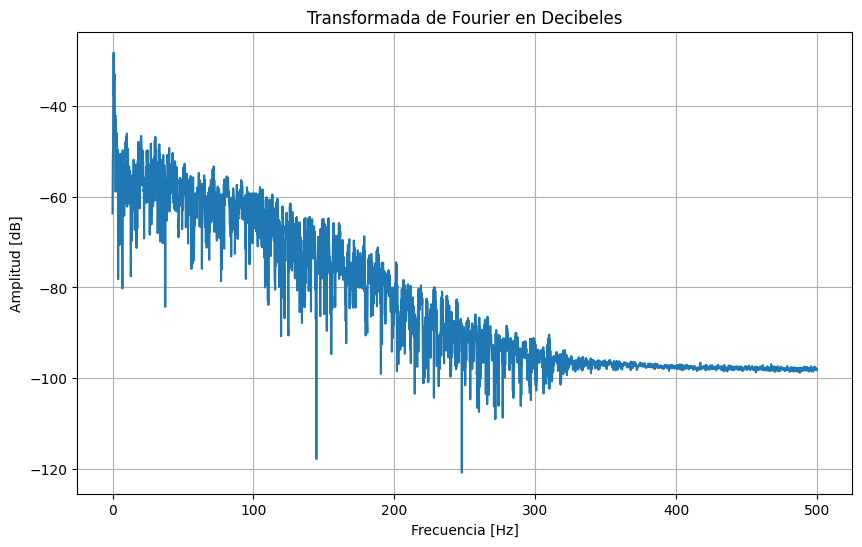


FFT para el Canal 6


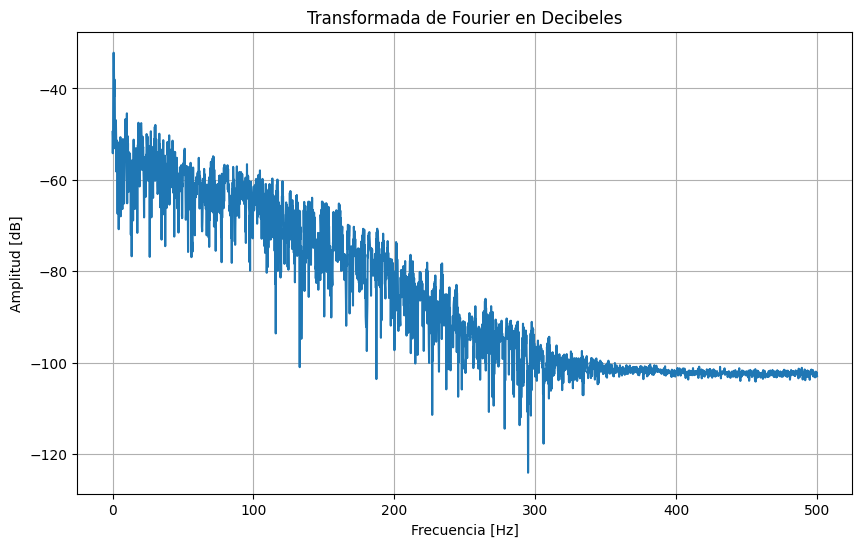

In [11]:
def plot_fft(signal, fs):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    fft_signal = np.fft.fft(signal)
    magnitude = np.abs(fft_signal) / n
    magnitude_db = 20 * np.log10(magnitude)
    
    plt.figure(figsize=(10, 6))
    plt.plot(freq[:n//2], magnitude_db[:n//2])
    plt.title('Transformada de Fourier en Decibeles')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud [dB]')
    plt.grid(True)
    plt.show()

# Aplicar y graficar la FFT para cada canal
for i in range(n_channels):
    print(f"\nFFT para el Canal {i+1}")
    plot_fft(signals[:, i], sample_rate)


Canal 1 - Número de picos detectados: 10


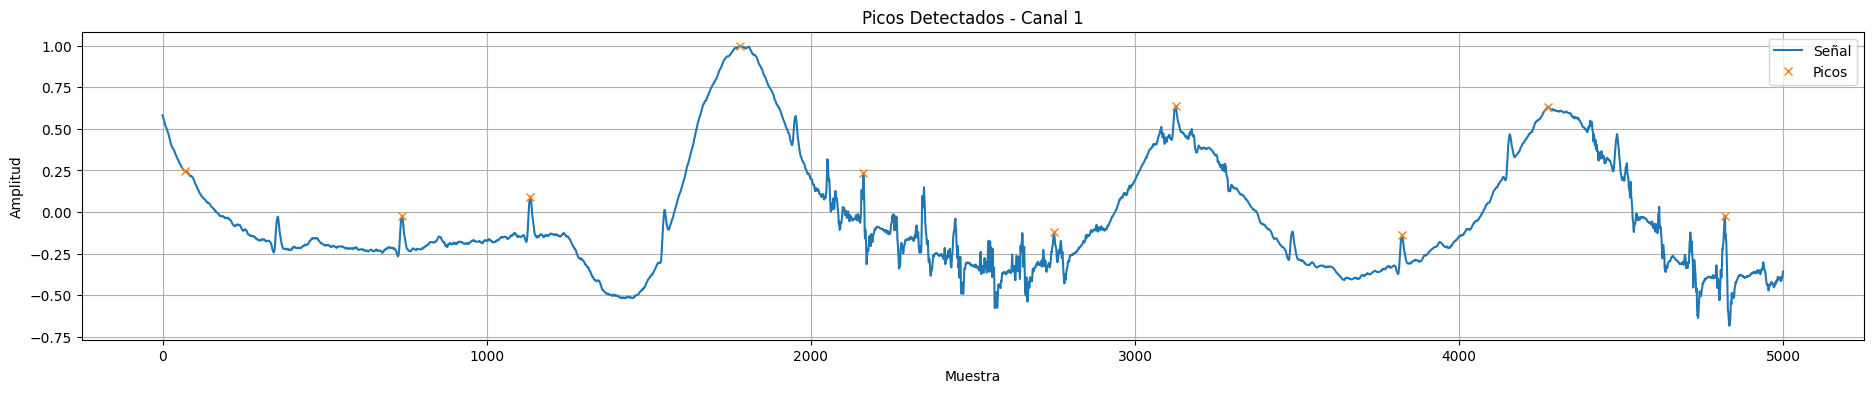

Canal 2 - Número de picos detectados: 10


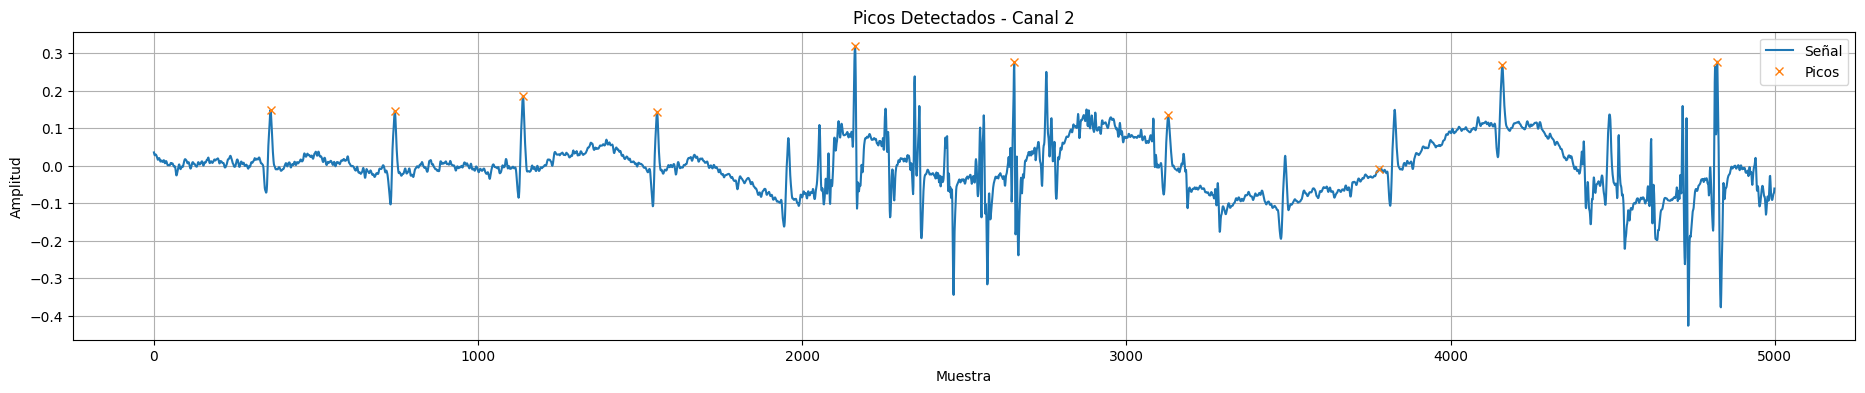

Canal 3 - Número de picos detectados: 10


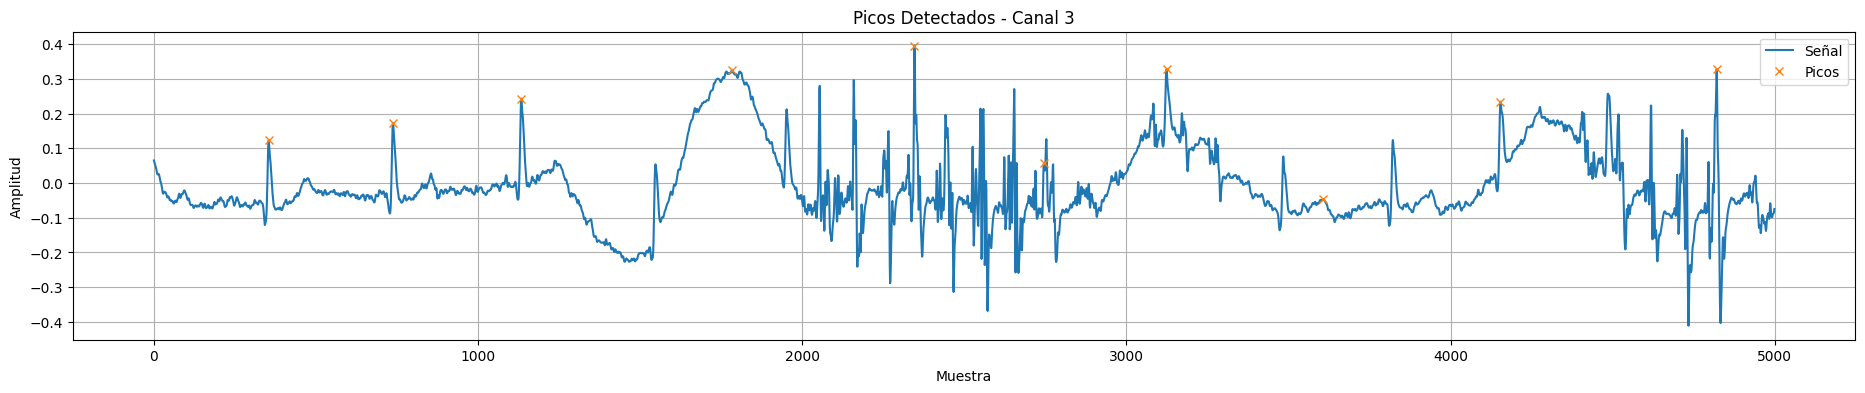

Canal 4 - Número de picos detectados: 10


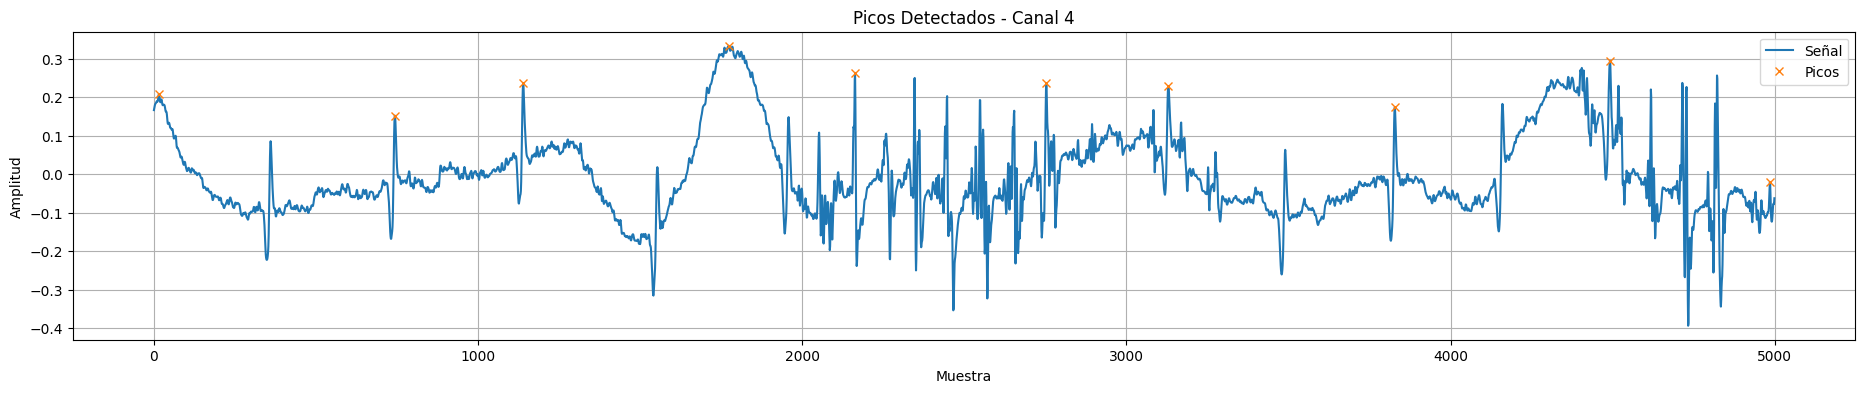

Canal 5 - Número de picos detectados: 10


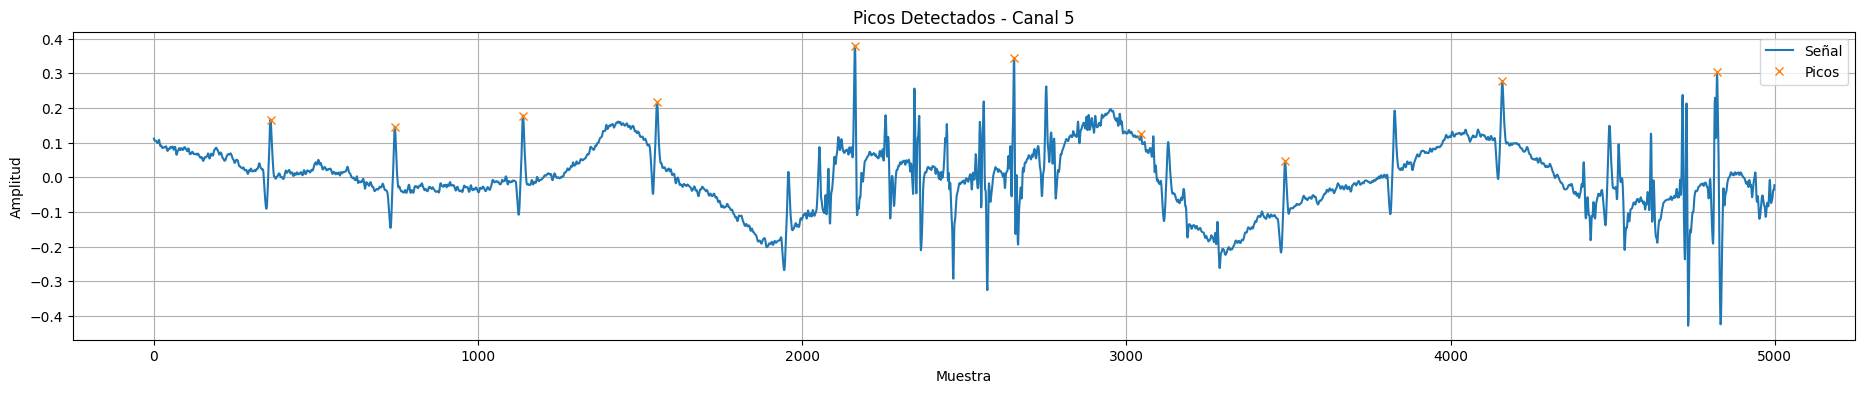

Canal 6 - Número de picos detectados: 10


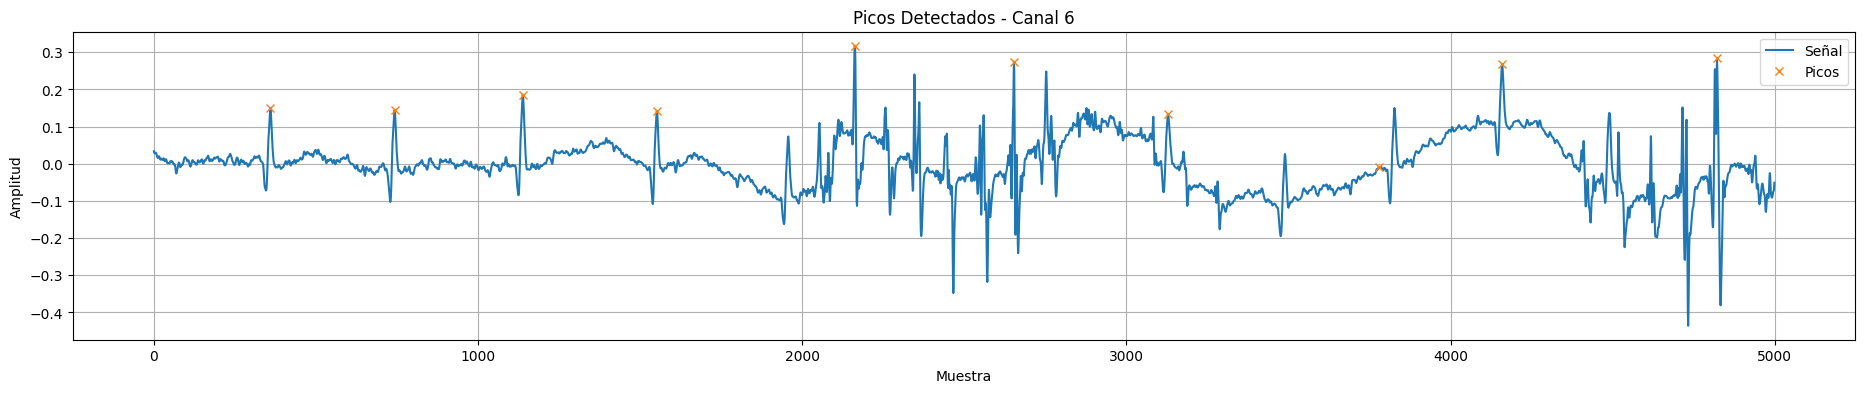

In [12]:
from scipy.signal import find_peaks

def detect_peaks(signal, fs):
    # Asumir frecuencia cardíaca fetal entre 120 y 160 bpm
    min_rr_interval = 0.375  # Intervalo RR mínimo en segundos
    distance = int(min_rr_interval * fs)
    
    # Ajustar el parámetro height si es necesario
    peaks, _ = find_peaks(signal, distance=distance)
    
    # Si no se detectan picos, intentar invertir la señal
    if len(peaks) == 0:
        inverted_signal = -signal
        peaks, _ = find_peaks(inverted_signal, distance=distance)
    
    return peaks

# Detectar picos para cada canal
for i in range(n_channels):
    peaks = detect_peaks(signals[:, i], sample_rate)
    print(f"Canal {i+1} - Número de picos detectados: {len(peaks)}")
    
    # Graficar la señal con los picos
    plt.figure(figsize=(23, 4))
    plt.plot(signals[:, i], label='Señal')
    plt.plot(peaks, signals[peaks, i], "x", label='Picos')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    plt.title(f'Picos Detectados - Canal {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [13]:
def calculate_mse(original_signal, processed_signal):
    mse = np.mean((original_signal - processed_signal) ** 2)
    return mse


In [14]:
from scipy.signal import firwin, lfilter

# Función para diseñar y aplicar un filtro FIR
def fir_filter(signal, cutoff, fs, numtaps=101, filter_type='lowpass'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    coeffs = firwin(numtaps, normal_cutoff, window='hamming', pass_zero=filter_type)
    filtered_signal = lfilter(coeffs, 1.0, signal)
    return filtered_signal

# Aplicar el filtro FIR al ruido
filtered_signal_fir = fir_filter(noisy_signal, cutoff_low, fs, numtaps=101, filter_type='lowpass')

# Calcular SNR y MSE después del filtrado FIR
snr_after_fir = calculate_snr(signals[:, 0], filtered_signal_fir)
mse_after_fir = calculate_mse(signals[:, 0], filtered_signal_fir)
print(f"SNR después del filtrado FIR: {snr_after_fir:.2f} dB")
print(f"MSE después del filtrado FIR: {mse_after_fir:.6f}")


SNR después del filtrado FIR: 0.14 dB
MSE después del filtrado FIR: 0.117636


In [15]:
def fft_filter(signal, fs, cutoff_low, cutoff_high):
    n = len(signal)
    # Aumentar el número de puntos mediante Zero Padding
    n_padded = n * 2
    freq = np.fft.fftfreq(n_padded, d=1/fs)
    signal_fft = np.fft.fft(signal, n=n_padded)

    # Crear una máscara para las frecuencias deseadas
    mask = np.zeros(n_padded)
    mask[(freq >= cutoff_high) & (freq <= cutoff_low)] = 1

    # Aplicar la máscara
    filtered_fft = signal_fft * mask

    # Transformada inversa
    filtered_signal = np.fft.ifft(filtered_fft)
    # Tomar la parte real y recortar al tamaño original
    filtered_signal = np.real(filtered_signal[:n])
    return filtered_signal

# Aplicar el filtro FFT
filtered_signal_fft = fft_filter(noisy_signal, fs, cutoff_low, cutoff_high)

# Calcular SNR y MSE después del filtrado FFT
snr_after_fft = calculate_snr(signals[:, 0], filtered_signal_fft)
mse_after_fft = calculate_mse(signals[:, 0], filtered_signal_fft)
print(f"SNR después del filtrado FFT: {snr_after_fft:.2f} dB")
print(f"MSE después del filtrado FFT: {mse_after_fft:.6f}")


SNR después del filtrado FFT: 0.09 dB
MSE después del filtrado FFT: 0.118996


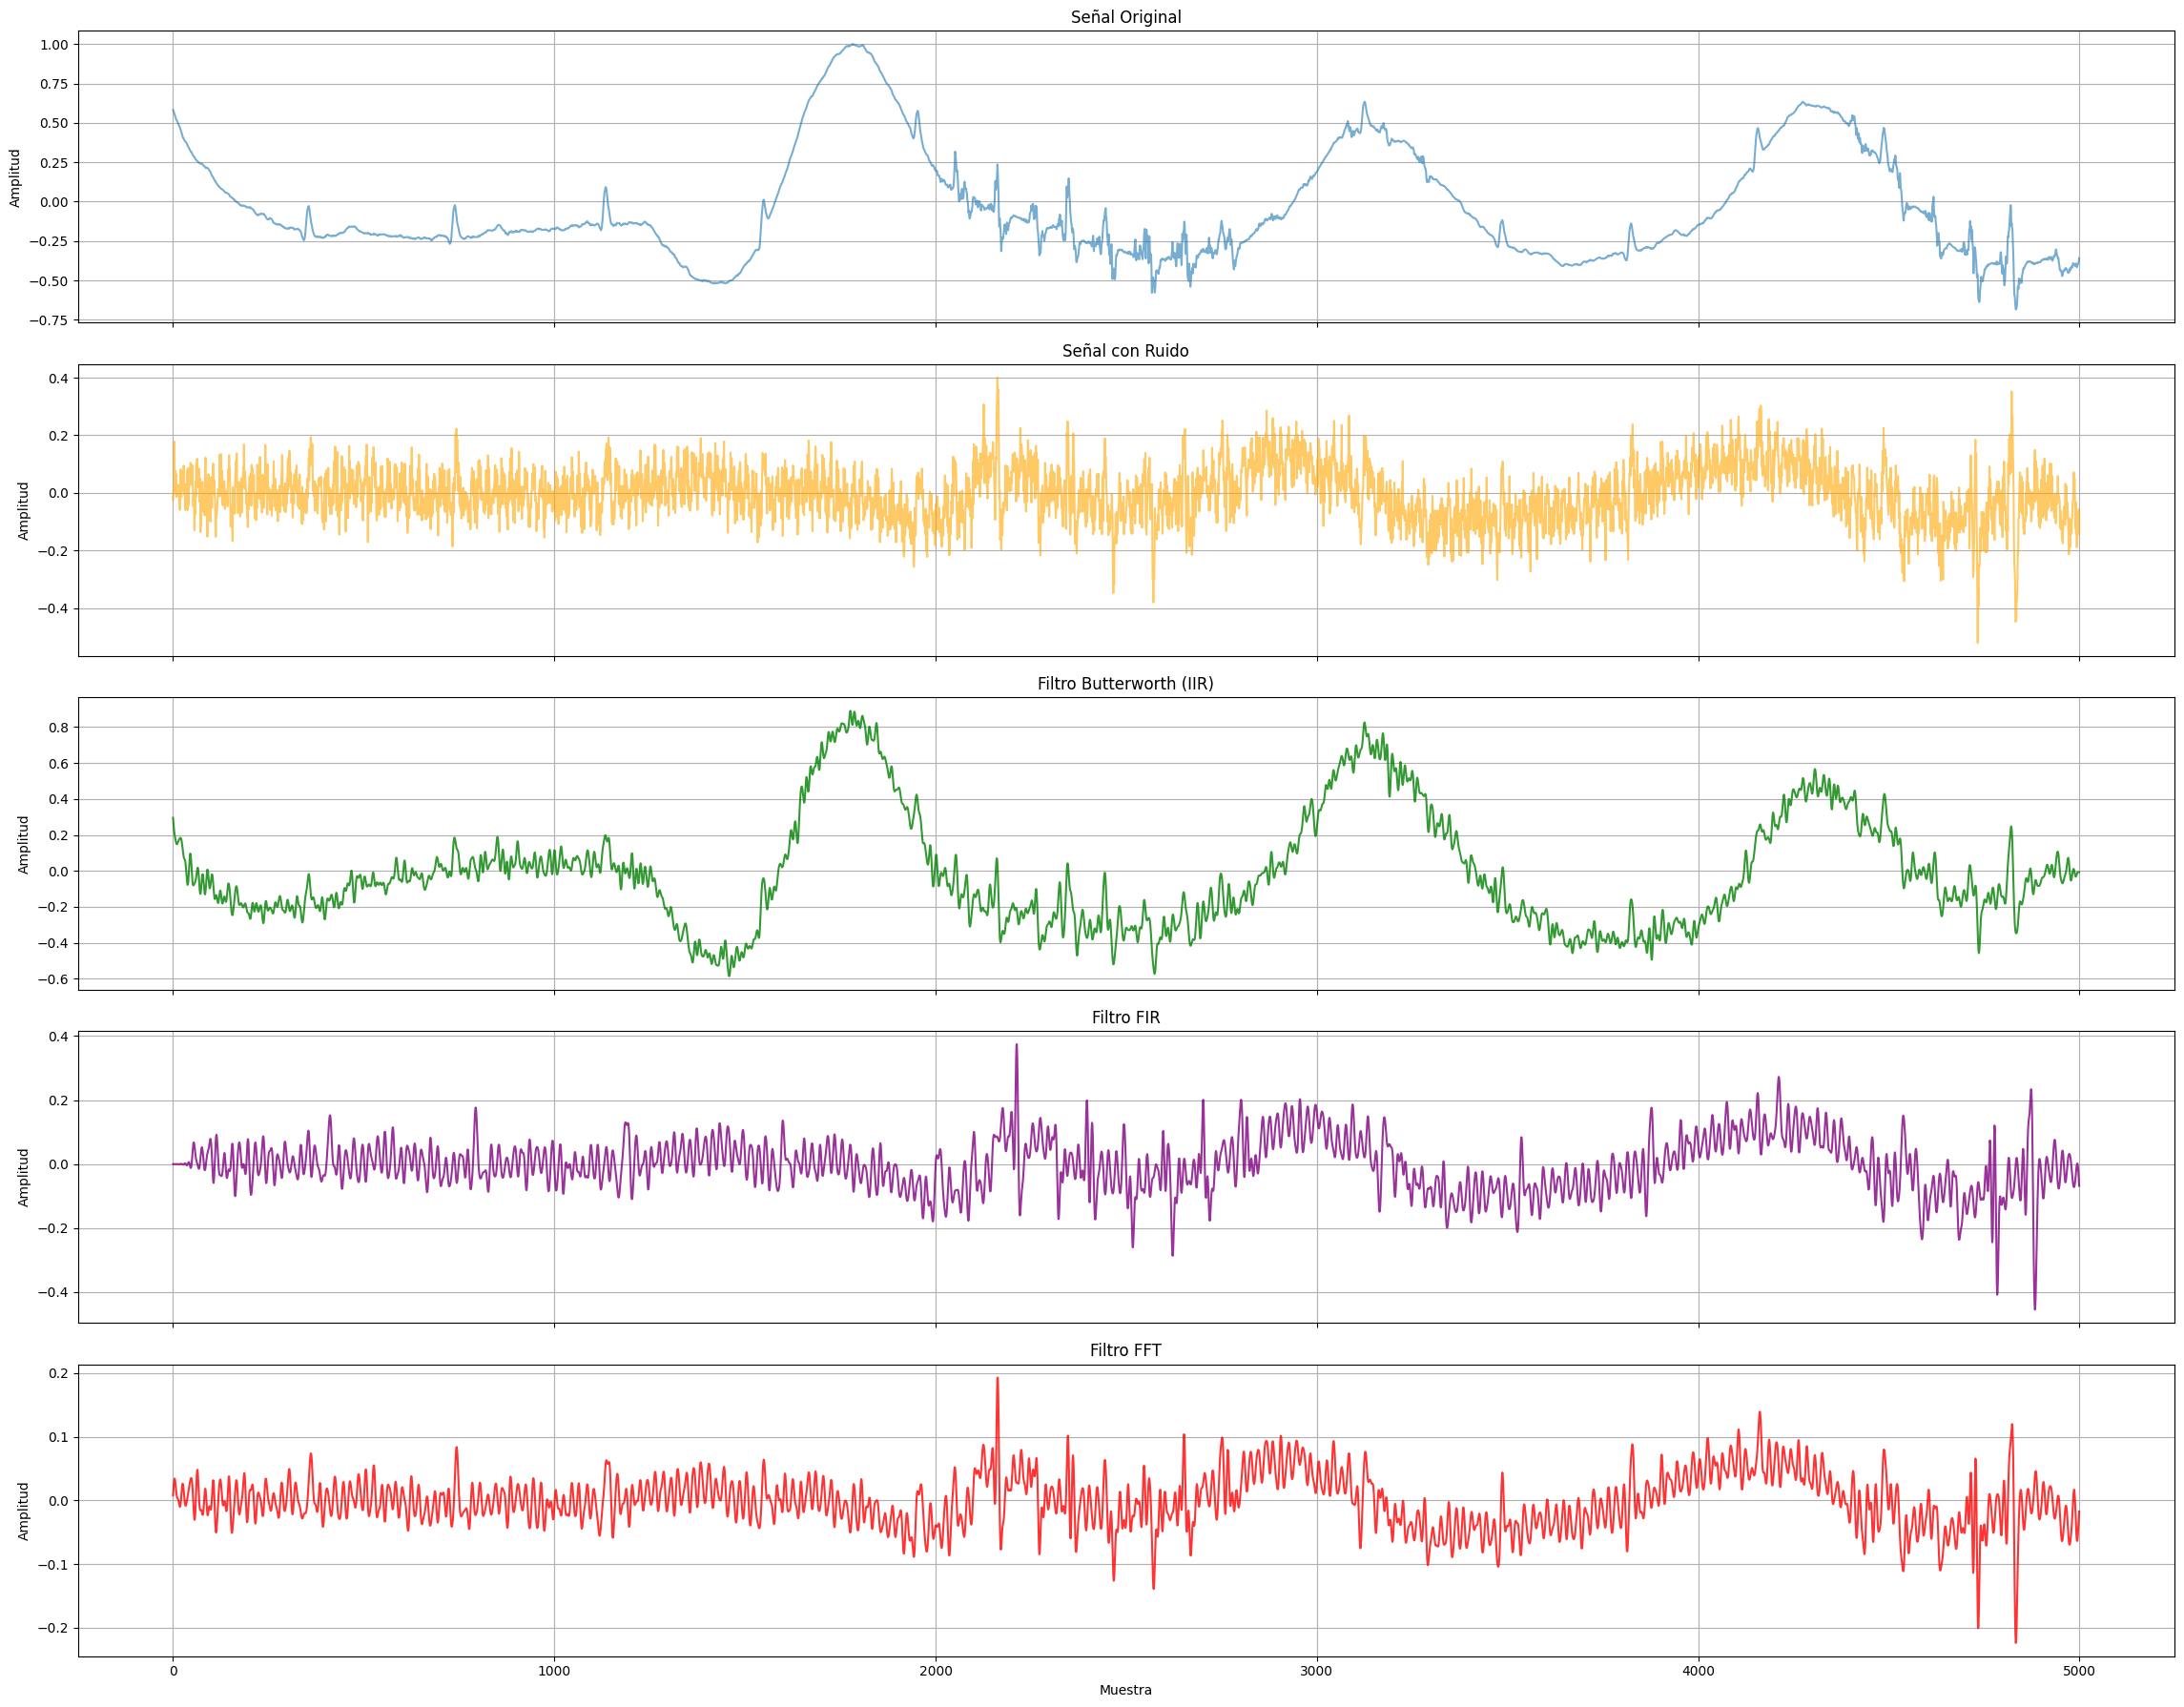

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 1, figsize=(23, 18), sharex=True)

axs[0].plot(signals[:, 0], label='Señal Original', alpha=0.6)
axs[0].set_title('Señal Original')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

axs[1].plot(noisy_signal, label='Señal con Ruido', alpha=0.6, color='orange')
axs[1].set_title('Señal con Ruido')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

axs[2].plot(filtered_signal_high, label='Filtro Butterworth (IIR)', alpha=0.8, color='green')
axs[2].set_title('Filtro Butterworth (IIR)')
axs[2].set_ylabel('Amplitud')
axs[2].grid(True)

axs[3].plot(filtered_signal_fir, label='Filtro FIR', alpha=0.8, color='purple')
axs[3].set_title('Filtro FIR')
axs[3].set_ylabel('Amplitud')
axs[3].grid(True)

axs[4].plot(filtered_signal_fft, label='Filtro FFT', alpha=0.8, color='red')
axs[4].set_title('Filtro FFT')
axs[4].set_xlabel('Muestra')
axs[4].set_ylabel('Amplitud')
axs[4].grid(True)

plt.tight_layout()
plt.show()
